In [3]:
import sqlite3
import pandas as pd

In [4]:
pd.set_option('display.max_rows', 10)

In [5]:
connection=sqlite3.connect('database.db')
connection.execute('PRAGMA foreign_keys = ON')
cursor = connection.cursor()

In [6]:
df = pd.read_csv('/Users/anastasiiaholovachova/Downloads/fifa23_players.csv', low_memory=False)
df.to_sql('table_1', connection, if_exists='replace', index=False)
connection.commit()

In [7]:
select_query='''
SELECT *
FROM table_1
'''

In [8]:
df = pd.read_sql_query(select_query, connection)
df

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
19234     261962  https://sofifa.com/player/261962/defu-song/220002   
19235     262040  https://sofifa.com/player/262040/caoimhin-port...   
19236     262760  https://sofifa.com/player/262760/nathan-logue/...   
19237     262820  https://sofifa.com/player/262820/luke-rudden/2...   
19238     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. Lewandowski                   Robert Lewandowski   
2       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3               Neymar Jr        Neymar da Silva Santos Júnior   
4            K. De Bruyne                      Kevin De Bruyne   
...                   ...                                  ...   
19234           Song Defu                                  宋德福   
19235           C. Porter                      Caoimhin Porter   
19236            N. Logue              Nathan Logue-Cunningham   
19237           L. Rudden                          Luke Rudden   
19238  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential    value_eur  wage_eur  age  ...  \
0           RW, ST, CF       93         93   78000000.0  320000.0   34  ...   
1                   ST       92         92  119500000.0  270000.0   32  ...   
2               ST, LW       91         91   45000000.0  270000.0   36  ...   
3              LW, CAM       91         91  129000000.0  270000.0   29  ...   
4              CM, CAM       91         91  125500000.0  350000.0   30  ...   
...                ...      ...        ...          ...       ...  ...  ...   
19234              CDM       47         52      70000.0    1000.0   22  ...   
19235               CM       47         59     110000.0     500.0   19  ...   
19236               CM       47         55     100000.0     500.0   21  ...   
19237               ST       47         60     110000.0     500.0   19  ...   
19238              CAM       47         60     110000.0     500.0   19  ...   

      goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                      6                    11                   15   
1                     15                     6                   12   
2                      7                    11                   15   
3                      9                     9                   15   
4                     15                    13                    5   
...                  ...                   ...                  ...   
19234                  6                    10                    5   
19235                 11                    12                    6   
19236                  8                     6                    7   
19237                  7                    10                    7   
19238                  8                    13                   13   

      goalkeeping_positioning  goalkeeping_reflexes goalkeeping_speed  \
0                          14                     8               NaN   
1                           8                    10               NaN   
2                          14                    11               NaN   
3                          15                    11               NaN   
4                          10                    13               NaN   
...                       ...                   ...               ...   
19234                      15                   

In [9]:
select_query='''
SELECT long_name, overall
FROM table_1
ORDER BY overall DESC
LIMIT 100
'''

In [10]:
df = pd.read_sql_query(select_query, connection)
df

long_name  overall
0        Lionel Andrés Messi Cuccittini       93
1                    Robert Lewandowski       92
2   Cristiano Ronaldo dos Santos Aveiro       91
3         Neymar da Silva Santos Júnior       91
4                       Kevin De Bruyne       91
..                                  ...      ...
95                   Achraf Hakimi Mouh       85
96                     Matthijs de Ligt       85
97                   Zlatan Ibrahimović       84
98                 Jesús Navas González       84
99                Gerard Piqué Bernabéu       84

[100 rows x 2 columns]

In [11]:
select_query='''
SELECT long_name, wage_eur
FROM table_1
ORDER BY wage_eur DESC
LIMIT 100
'''

In [12]:
df = pd.read_sql_query(select_query, connection)
df

long_name  wage_eur
0                     Kevin De Bruyne  350000.0
1                       Karim Benzema  350000.0
2      Lionel Andrés Messi Cuccittini  320000.0
3   Carlos Henrique Venancio Casimiro  310000.0
4                          Toni Kroos  310000.0
..                                ...       ...
95               Éder Gabriel Militão  130000.0
96                    Anthony Martial  130000.0
97                         Luka Jović  130000.0
98                        Hugo Lloris  125000.0
99                      Ciro Immobile  125000.0

[100 rows x 2 columns]

In [13]:
select_query='''
SELECT long_name, overall
FROM table_1
WHERE player_positions = 'GK'
ORDER BY overall DESC
LIMIT 30
'''
df = pd.read_sql_query(select_query, connection)
df

long_name  overall
0                       Jan Oblak       91
1              Manuel Peter Neuer       90
2           Marc-André ter Stegen       90
3                Thibaut Courtois       89
4       Ederson Santana de Moraes       89
..                            ...      ...
25               Salvatore Sirigu       82
26  Rui Pedro dos Santos Patrício       82
27                    Kevin Trapp       82
28                Alphonse Areola       82
29                 Oliver Baumann       82

[30 rows x 2 columns]

In [14]:
select_query='''
SELECT club_name, overall
FROM table_1
ORDER BY overall DESC
LIMIT 30
'''
df = pd.read_sql_query(select_query, connection)
df

club_name  overall
0   Paris Saint-Germain       93
1     FC Bayern München       92
2     Manchester United       91
3   Paris Saint-Germain       91
4       Manchester City       91
..                  ...      ...
25              Chelsea       88
26  Paris Saint-Germain       88
27      Manchester City       88
28    Manchester United       88
29    Borussia Dortmund       88

[30 rows x 2 columns]

In [15]:
select_query='''
SELECT club_name, AVG(pace)
FROM table_1
GROUP BY club_name
ORDER BY AVG(pace) DESC
LIMIT 30
'''
df = pd.read_sql_query(select_query, connection)
df

club_name  AVG(pace)
0        FC Red Bull Salzburg  76.640000
1          New York Red Bulls  76.272727
2             SK Slavia Praha  75.800000
3         Paris Saint-Germain  75.724138
4            Shakhtar Donetsk  75.640000
..                        ...        ...
25                   AC Milan  73.720000
26         Atlético de Madrid  73.607143
27                Sporting CP  73.476190
28               Club América  73.434783
29  RCD Espanyol de Barcelona  73.400000

[30 rows x 2 columns]

In [16]:
select_query='''
SELECT league_name, SUM(dribbling)
FROM table_1
GROUP BY league_name
ORDER BY SUM(dribbling) DESC
'''
df = pd.read_sql_query(select_query, connection)
df

league_name  SUM(dribbling)
0         USA Major League Soccer         42564.0
1      Argentina Primera División         42173.0
2          English Premier League         40369.0
3     English League Championship         39919.0
4          Spain Primera Division         39362.0
..                            ...             ...
51  Hungarian Nemzeti Bajnokság I          1611.0
52        UAE Arabian Gulf League          1545.0
53         Cypriot First Division          1528.0
54          Finnish Veikkausliiga          1376.0
55        English National League          1344.0

[56 rows x 2 columns]

In [17]:
select_query='''
SELECT club_name, SUM(overall), COUNT (DISTINCT club_position)
FROM table_1
GROUP BY club_name
HAVING COUNT (DISTINCT club_position) > 11
ORDER BY SUM(overall) DESC
LIMIT 30
'''
df = pd.read_sql_query(select_query, connection)
df

club_name  SUM(overall)  COUNT (DISTINCT club_position)
0   Paris Saint-Germain          2622                              13
1     Manchester United          2574                              13
2        Real Madrid CF          2566                              13
3          FC Barcelona          2534                              13
4               Chelsea          2520                              13
..                  ...           ...                             ...
25     Newcastle United          2355                              13
26         RCD Mallorca          2347                              13
27     RC Celta de Vigo          2346                              13
28    Borussia Dortmund          2346                              13
29           RB Leipzig          2345                              13

[30 rows x 3 columns]

In [18]:
def EDA(df):
    total_na = df.isna().sum().sum()
    print('Dimensions:', df.shape[0], ' - rows', df.shape[1], ' - columns')
    print('Total NA\'s', total_na)
    print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "Count Distinct", "NA Values"))
    col_name = df.columns
    dtypes = df.dtypes
    uniq = df.nunique()
    na_val = df.isna().sum()
    for i in range(len(df.columns)):
        print("%38s %10s     %10s %10s" % (col_name[i], dtypes[i], uniq[i], na_val[i]))

In [19]:
df = pd.read_csv('/Users/anastasiiaholovachova/Downloads/fifa23_players.csv', low_memory=False)

In [20]:
EDA(df)

Dimensions: 19239  - rows 80  - columns
Total NA's 152557
                           Column Name  Data Type     Count Distinct  NA Values
                             sofifa_id      int64          19239          0
                            player_url     object          19239          0
                            short_name     object          18145          0
                             long_name     object          19219          0
                      player_positions     object            674          0
                               overall      int64             47          0
                             potential      int64             46          0
                             value_eur    float64            252         74
                              wage_eur    float64            133         61
                                   age      int64             29          0
                                   dob     object           6312          0
                          

In [21]:
gp = df.groupby('nationality_name')['long_name'].value_counts().reset_index(name='C')

In [22]:
df['new'] = df.groupby('nationality_name')['long_name'].transform('size')
df

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
19234     261962  https://sofifa.com/player/261962/defu-song/220002   
19235     262040  https://sofifa.com/player/262040/caoimhin-port...   
19236     262760  https://sofifa.com/player/262760/nathan-logue/...   
19237     262820  https://sofifa.com/player/262820/luke-rudden/2...   
19238     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. Lewandowski                   Robert Lewandowski   
2       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3               Neymar Jr        Neymar da Silva Santos Júnior   
4            K. De Bruyne                      Kevin De Bruyne   
...                   ...                                  ...   
19234           Song Defu                                  宋德福   
19235           C. Porter                      Caoimhin Porter   
19236            N. Logue              Nathan Logue-Cunningham   
19237           L. Rudden                          Luke Rudden   
19238  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential    value_eur  wage_eur  age  ...  \
0           RW, ST, CF       93         93   78000000.0  320000.0   34  ...   
1                   ST       92         92  119500000.0  270000.0   32  ...   
2               ST, LW       91         91   45000000.0  270000.0   36  ...   
3              LW, CAM       91         91  129000000.0  270000.0   29  ...   
4              CM, CAM       91         91  125500000.0  350000.0   30  ...   
...                ...      ...        ...          ...       ...  ...  ...   
19234              CDM       47         52      70000.0    1000.0   22  ...   
19235               CM       47         59     110000.0     500.0   19  ...   
19236               CM       47         55     100000.0     500.0   21  ...   
19237               ST       47         60     110000.0     500.0   19  ...   
19238              CAM       47         60     110000.0     500.0   19  ...   

      goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                       11                   15                       14   
1                        6                   12                        8   
2                       11                   15                       14   
3                        9                   15                       15   
4                       13                    5                       10   
...                    ...                  ...                      ...   
19234                   10                    5                       15   
19235                   12                    6                        8   
19236                    6                    7                       10   
19237                   10                    7                       14   
19238                   13                   13                        9   

      goalkeeping_reflexes  goalkeeping_speed  \
0                        8                NaN   
1                       10                NaN   
2                       11                NaN   
3                       11                NaN   
4                       13                NaN   
...                    ...                ...   
19234                   13                NaN   
19235                   10                NaN   
19236                    6                NaN   
19237    

In [23]:
grp = df.groupby('club_position')['long_name'].value_counts().reset_index(name='B')
df['new2'] = df.groupby('club_position')['long_name'].transform('size')
df

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
19234     261962  https://sofifa.com/player/261962/defu-song/220002   
19235     262040  https://sofifa.com/player/262040/caoimhin-port...   
19236     262760  https://sofifa.com/player/262760/nathan-logue/...   
19237     262820  https://sofifa.com/player/262820/luke-rudden/2...   
19238     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. Lewandowski                   Robert Lewandowski   
2       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3               Neymar Jr        Neymar da Silva Santos Júnior   
4            K. De Bruyne                      Kevin De Bruyne   
...                   ...                                  ...   
19234           Song Defu                                  宋德福   
19235           C. Porter                      Caoimhin Porter   
19236            N. Logue              Nathan Logue-Cunningham   
19237           L. Rudden                          Luke Rudden   
19238  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential    value_eur  wage_eur  age  ...  \
0           RW, ST, CF       93         93   78000000.0  320000.0   34  ...   
1                   ST       92         92  119500000.0  270000.0   32  ...   
2               ST, LW       91         91   45000000.0  270000.0   36  ...   
3              LW, CAM       91         91  129000000.0  270000.0   29  ...   
4              CM, CAM       91         91  125500000.0  350000.0   30  ...   
...                ...      ...        ...          ...       ...  ...  ...   
19234              CDM       47         52      70000.0    1000.0   22  ...   
19235               CM       47         59     110000.0     500.0   19  ...   
19236               CM       47         55     100000.0     500.0   21  ...   
19237               ST       47         60     110000.0     500.0   19  ...   
19238              CAM       47         60     110000.0     500.0   19  ...   

      goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  \
0                      15                       14                     8   
1                      12                        8                    10   
2                      15                       14                    11   
3                      15                       15                    11   
4                       5                       10                    13   
...                   ...                      ...                   ...   
19234                   5                       15                    13   
19235                   6                        8                    10   
19236                   7                       10                     6   
19237                   7                       14                    15   
19238                  13                        9                    14   

      goalkeeping_speed                                    player_face_url  \
0                   NaN  https://cdn.sofifa.net/players/158/023/22_120.png   
1                   NaN  https://cdn.sofifa.net/players/188/545/22_120.png   
2                   NaN  https://cdn.sofifa.net/players/020/801/22_120.png   
3                   NaN  https://cdn.sofifa.net/players/190/871/22_120.png   
4                   NaN  https://cdn.sofifa.net/players/192/985/22_120.png   
...                 ...        

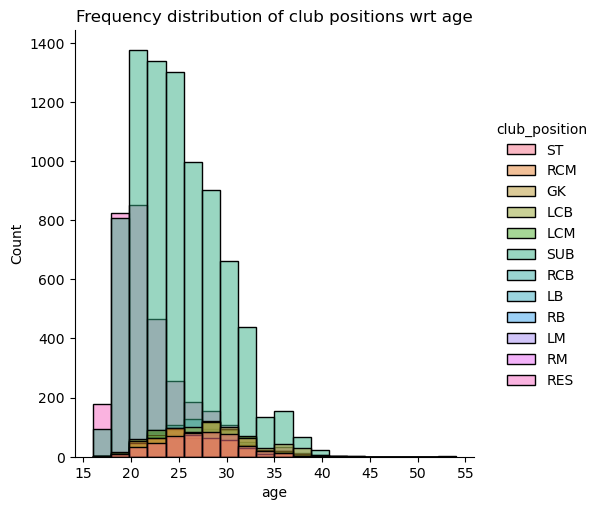

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.displot(x='age', hue = 'club_position', data = df[df['new2']>300], bins = 20).set(title='Frequency distribution of club positions wrt age')
plt.show()

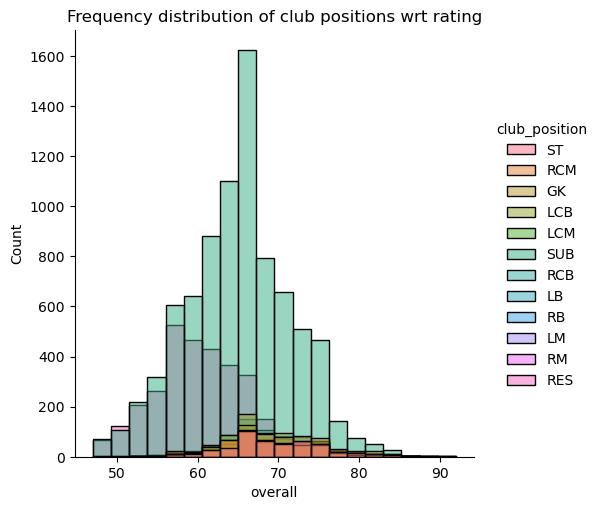

In [25]:
ax = sns.displot(x='overall', hue = 'club_position', data = df[df['new2']>300],  bins = 20).set(title='Frequency distribution of club positions wrt rating')
plt.show()

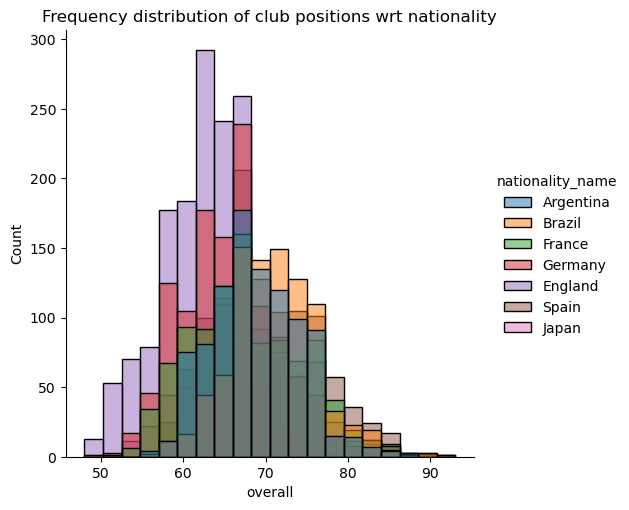

In [26]:
ax = sns.displot(x='overall', hue = 'nationality_name', data = df[df['new']>500], bins = 20).set(title='Frequency distribution of club positions wrt nationality')
plt.show()

In [27]:
#Penalty metric:

#penalty_score=1/6*(mentality_penalties + power_shot_power + skill_ball_control + 0,75*shooting + 0,5*(mentality_aggression+defending_marking_awareness))

#In my opinion mentality_penalties, power_shot_power and skill_ball_control are the most crucial. Shooting is less crucial, hence I multiplied it by 0,75 and mentality_aggression and defending_marking_awareness are least crucial, but still needed, so they will be taken with 0,5 wage. The whole sum is divided by 6 to match 0 to 100 scale. 

In [28]:
#Goalkeeper metric:

#goalkeeping_score=1/6*(goalkeeping_reflexes+goalkeeping_speed+movement_reactions)+0.8*(goalkeeping_handling+goalkeeping_positioning+goalkeeping_diving)

#In my opinion goalkeeping_reflexes, goalkeeping_speed and movement_reactions are the most important, hence taken with the wage 1, but goalkeeping_handling, goalkeeping_positioning and goalkeeping_diving are a bit less crucial, so thaken with the wage 0,8. The whole sum is divided by 6 to match 0 to 100 scale. 

In [29]:
def add_penalty_metric(df_row):
    if df_row['club_position'] == 'GK':
        penalty_score = ''
    else:
        penalty_score = 1/6*(float(df_row['mentality_penalties']) + float(df_row['power_shot_power']) + float(df_row['skill_ball_control']) + 0.75*float(df_row['shooting']) + 0.5*(float(df_row['mentality_aggression'])+float(df_row['defending_marking_awareness']))) 
    return penalty_score

In [30]:
df['penalty_score'] = df.apply(add_penalty_metric, axis=1)
df

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
19234     261962  https://sofifa.com/player/261962/defu-song/220002   
19235     262040  https://sofifa.com/player/262040/caoimhin-port...   
19236     262760  https://sofifa.com/player/262760/nathan-logue/...   
19237     262820  https://sofifa.com/player/262820/luke-rudden/2...   
19238     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. Lewandowski                   Robert Lewandowski   
2       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3               Neymar Jr        Neymar da Silva Santos Júnior   
4            K. De Bruyne                      Kevin De Bruyne   
...                   ...                                  ...   
19234           Song Defu                                  宋德福   
19235           C. Porter                      Caoimhin Porter   
19236            N. Logue              Nathan Logue-Cunningham   
19237           L. Rudden                          Luke Rudden   
19238  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential    value_eur  wage_eur  age  ...  \
0           RW, ST, CF       93         93   78000000.0  320000.0   34  ...   
1                   ST       92         92  119500000.0  270000.0   32  ...   
2               ST, LW       91         91   45000000.0  270000.0   36  ...   
3              LW, CAM       91         91  129000000.0  270000.0   29  ...   
4              CM, CAM       91         91  125500000.0  350000.0   30  ...   
...                ...      ...        ...          ...       ...  ...  ...   
19234              CDM       47         52      70000.0    1000.0   22  ...   
19235               CM       47         59     110000.0     500.0   19  ...   
19236               CM       47         55     100000.0     500.0   21  ...   
19237               ST       47         60     110000.0     500.0   19  ...   
19238              CAM       47         60     110000.0     500.0   19  ...   

      goalkeeping_positioning  goalkeeping_reflexes  goalkeeping_speed  \
0                          14                     8                NaN   
1                           8                    10                NaN   
2                          14                    11                NaN   
3                          15                    11                NaN   
4                          10                    13                NaN   
...                       ...                   ...                ...   
19234                      15                    13                NaN   
19235                       8                    10                NaN   
19236                      10                     6                NaN   
19237                      14                    15                NaN   
19238                       9                    14                NaN   

                                         player_face_url  \
0      https://cdn.sofifa.net/players/158/023/22_120.png   
1      https://cdn.sofifa.net/players/188/545/22_120.png   
2      https://cdn.sofifa.net/players/020/801/22_120.png   
3      https://cdn.sofifa.net/players/190/871/22_120.png   
4      https://cdn.sofifa.net/players/192/985/22_120.png   
...                                                  ...   
19234  https://cdn.sofifa.net/players/261/962/22_120.png   
19235  https://cdn.sofifa.net/players/262/0

In [31]:
def add_gk_metric(df_row):
    if df_row['club_position'] == 'GK':
        gk_score = 1/6*(float(df_row['goalkeeping_reflexes']) + float(df_row['goalkeeping_speed']) + float(df_row['movement_reactions'])+ 0.8*(float(df_row['goalkeeping_handling']) + float(df_row['goalkeeping_positioning'])+float(df_row['goalkeeping_diving'])))
    else:
        gk_score = ''
    return gk_score

In [32]:
df['gk_score'] = df.apply(add_gk_metric, axis=1)
df

sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
19234     261962  https://sofifa.com/player/261962/defu-song/220002   
19235     262040  https://sofifa.com/player/262040/caoimhin-port...   
19236     262760  https://sofifa.com/player/262760/nathan-logue/...   
19237     262820  https://sofifa.com/player/262820/luke-rudden/2...   
19238     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. Lewandowski                   Robert Lewandowski   
2       Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
3               Neymar Jr        Neymar da Silva Santos Júnior   
4            K. De Bruyne                      Kevin De Bruyne   
...                   ...                                  ...   
19234           Song Defu                                  宋德福   
19235           C. Porter                      Caoimhin Porter   
19236            N. Logue              Nathan Logue-Cunningham   
19237           L. Rudden                          Luke Rudden   
19238  E. Lalchhanchhuaha              Emanuel Lalchhanchhuaha   

      player_positions  overall  potential    value_eur  wage_eur  age  ...  \
0           RW, ST, CF       93         93   78000000.0  320000.0   34  ...   
1                   ST       92         92  119500000.0  270000.0   32  ...   
2               ST, LW       91         91   45000000.0  270000.0   36  ...   
3              LW, CAM       91         91  129000000.0  270000.0   29  ...   
4              CM, CAM       91         91  125500000.0  350000.0   30  ...   
...                ...      ...        ...          ...       ...  ...  ...   
19234              CDM       47         52      70000.0    1000.0   22  ...   
19235               CM       47         59     110000.0     500.0   19  ...   
19236               CM       47         55     100000.0     500.0   21  ...   
19237               ST       47         60     110000.0     500.0   19  ...   
19238              CAM       47         60     110000.0     500.0   19  ...   

      goalkeeping_reflexes  goalkeeping_speed  \
0                        8                NaN   
1                       10                NaN   
2                       11                NaN   
3                       11                NaN   
4                       13                NaN   
...                    ...                ...   
19234                   13                NaN   
19235                   10                NaN   
19236                    6                NaN   
19237                   15                NaN   
19238                   14                NaN   

                                         player_face_url  \
0      https://cdn.sofifa.net/players/158/023/22_120.png   
1      https://cdn.sofifa.net/players/188/545/22_120.png   
2      https://cdn.sofifa.net/players/020/801/22_120.png   
3      https://cdn.sofifa.net/players/190/871/22_120.png   
4      https://cdn.sofifa.net/players/192/985/22_120.png   
...                                                  ...   
19234  https://cdn.sofifa.net/players/261/962/22_120.png   
19235  https://cdn.sofifa.net/players/262/040/22_120.png   
19236  https://cdn.sofifa.net/players/262/760/22_120.png   
19237  https://cdn.sofifa.net/players/262/820/22_120.png   
19238  https://cdn.sofifa.net/players/264/540/22_120.png   

                                    club_logo_url  \
0          https://cdn.sofifa.net/teams/73/60.png

In [33]:
df.to_sql('table_1', connection, if_exists='replace', index=False)
connection.commit()

In [34]:
select_query='''
SELECT club_name, AVG(penalty_score), SUM(gk_score)
FROM table_1
GROUP BY club_name
ORDER BY AVG(penalty_score) DESC
LIMIT 30
'''
df = pd.read_sql_query(select_query, connection)
df

club_name  AVG(penalty_score)  SUM(gk_score)
0              Juventus           53.562500      70.500000
1   Paris Saint-Germain           52.952778      72.366667
2                 Inter           52.820000      69.366667
3     Manchester United           52.286111      70.366667
4        Real Madrid CF           51.842742      70.866667
..                  ...                 ...            ...
25                 Roma           49.300000      67.933333
26   Olympique Lyonnais           49.288690      70.766667
27    Borussia Dortmund           49.284483      61.933333
28          Sporting CP           49.178030      67.433333
29        Villarreal CF           49.151882      66.733333

[30 rows x 3 columns]

In [35]:
select_query='''
SELECT club_name, SUM(gk_score),AVG(penalty_score)
FROM table_1
GROUP BY club_name
ORDER BY SUM(gk_score) DESC
LIMIT 30
'''
df = pd.read_sql_query(select_query, connection)
df

club_name  SUM(gk_score)  AVG(penalty_score)
0       Manchester City      74.266667           50.966667
1    Atlético de Madrid      73.866667           50.998563
2     FC Bayern München      73.833333           50.685897
3     Tottenham Hotspur      73.333333           48.373698
4             Liverpool      72.933333           49.801724
..                  ...            ...                 ...
25                 Roma      67.933333           49.300000
26  Eintracht Frankfurt      67.933333           48.379310
27  Bayer 04 Leverkusen      67.633333           48.876667
28       TSG Hoffenheim      67.500000           46.145833
29          Sporting CP      67.433333           49.178030

[30 rows x 3 columns]

In [36]:
select_query='''
SELECT club_name, (SUM(gk_score)-AVG(penalty_score)) as diff
FROM table_1
GROUP BY club_name
HAVING diff > 23
ORDER BY SUM(gk_score) DESC
LIMIT 30
'''
df = pd.read_sql_query(select_query, connection)
df

#clubs where goal keepers are way better than penalty players

club_name       diff
0        Manchester City  23.300000
1      FC Bayern München  23.147436
2      Tottenham Hotspur  24.959635
3              Liverpool  23.131609
4            Aston Villa  23.180747
5  Centro Atlético Fénix  25.406140

In [37]:
select_query='''
SELECT club_name, (SUM(gk_score)-AVG(penalty_score)) as diff
FROM table_1
GROUP BY club_name
HAVING diff < 5 and diff > 0
ORDER BY SUM(gk_score) DESC
LIMIT 30
'''
df = pd.read_sql_query(select_query, connection)
df

#clubs where penalty players are way better than goal keepers

club_name      diff
0                FC Sion  4.698765
1               Daegu FC  4.651235
2         Djurgårdens IF  3.702381
3            Shenzhen FC  2.230903
4             Dundalk FC  3.109420
5             Al Taawoun  2.654938
6  FC Academica Clinceni  1.139744
7          Brisbane Roar  2.841667

In [38]:
select_query='''
SELECT club_name,penalty_score
FROM table_1
ORDER BY penalty_score DESC
LIMIT 10
'''
df = pd.read_sql_query(select_query, connection)
df

club_name     penalty_score
0    Manchester United             67.75
1      Manchester City  66.9166666666667
2    Tottenham Hotspur  66.7083333333333
3             AC Milan  66.1666666666667
4    FC Bayern München  65.8333333333333
5  Paris Saint-Germain  65.5833333333333
6                Inter  65.5416666666667
7    Manchester United  65.0416666666667
8   Atlético de Madrid              65.0
9            Liverpool            64.875

In [39]:
select_query='''
SELECT club_name,gk_score
FROM table_1
ORDER BY gk_score DESC
LIMIT 10
'''
df = pd.read_sql_query(select_query, connection)
df

club_name          gk_score
0      Manchester City  74.2666666666667
1   Atlético de Madrid  73.8666666666667
2    FC Bayern München  73.8333333333333
3    Tottenham Hotspur  73.3333333333333
4            Liverpool  72.9333333333333
5  Paris Saint-Germain  72.3666666666667
6         FC Barcelona              71.3
7       Real Madrid CF  70.8666666666667
8   Olympique Lyonnais  70.7666666666667
9          Aston Villa  70.6333333333333

In [40]:
# Insights for the business:
# make a decision to buy a new player based on overall team rating
# make a decision to replace a player based on individual performance in a team context
# make a decision to balance the team based on individual performance and team performance (fx goalkeepers are much weaker than penalty players)
# make above decisions based costs
# know where to look for a desired player: countries, clubs, age categories

In [41]:
df = pd.read_csv('/Users/anastasiiaholovachova/Downloads/fifa23_players.csv', low_memory=False)
EDA(df)

Dimensions: 19239  - rows 80  - columns
Total NA's 152557
                           Column Name  Data Type     Count Distinct  NA Values
                             sofifa_id      int64          19239          0
                            player_url     object          19239          0
                            short_name     object          18145          0
                             long_name     object          19219          0
                      player_positions     object            674          0
                               overall      int64             47          0
                             potential      int64             46          0
                             value_eur    float64            252         74
                              wage_eur    float64            133         61
                                   age      int64             29          0
                                   dob     object           6312          0
                          

In [42]:
duplicates = df[df.duplicated()]

In [43]:
duplicates

Empty DataFrame
Columns: [sofifa_id, player_url, short_name, long_name, player_positions, overall, potential, value_eur, wage_eur, age, dob, height_cm, weight_kg, club_position, club_team_id, club_name, league_name, league_level, club_loaned_from, club_joined, club_jersey_number, club_contract_valid_until, nationality_name, nation_team_id, nation_position, nation_jersey_number, preferred_foot, weak_foot, skill_moves, international_reputation, work_rate, body_type, release_clause_eur, player_tags, player_traits, pace, shooting, passing, dribbling, defending, physic, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking_awareness, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, goalkeeping_speed, player_face_url, club_logo_url, nation_logo_url, nation_flag_url]
Index: []

[0 rows x 80 columns]

In [44]:
#value - missing for some of the players, can be filled in based on wage if needed
#CF - too few values
#over 100 kg and lower than 190 cm - outliers
#weight < 55 and height > 170 - outliers
#goalkeeping traits present for non-GKs
#atacking and defending traints present for GKs
#preferred foot - replace with boolean

In [45]:
continuous_variables = ['overall','potential','value_eur','wage_eur','age', 'height_cm','weight_kg','release_clause_eur', 'pace','shooting','passing','dribbling','defending','physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance', 'power_shot_power', 'power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking_awareness','defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes','goalkeeping_speed']
categorical_variables = ['player_positions', 'dob', 'club_position','club_team_id','club_name','league_name','league_level','club_loaned_from','club_joined','club_jersey_number','club_contract_valid_until','nationality_name','nation_team_id','nation_position','nation_jersey_number','preferred_foot','weak_foot','skill_moves','international_reputation','work_rate','body_type','player_tags','player_traits']

In [46]:
for variable in categorical_variables:
    print(df[variable].value_counts()/float(len(df)))

CB              0.125942
GK              0.110817
ST              0.092001
CDM, CM         0.049535
CM              0.037736
                  ...   
CAM, CDM, ST    0.000052
CDM, RWB, CB    0.000052
ST, CAM, RW     0.000052
ST, CF, RM      0.000052
CDM, LM, LB     0.000052
Name: player_positions, Length: 674, dtype: float64
1992-02-29    0.006497
1996-02-29    0.006237
2000-02-29    0.004782
1988-02-29    0.001767
1999-02-25    0.000676
                ...   
1994-10-15    0.000052
1994-02-12    0.000052
1991-09-18    0.000052
1994-11-26    0.000052
2004-02-07    0.000052
Name: dob, Length: 6312, dtype: float64
SUB    0.431363
RES    0.164666
RCB    0.036436
GK     0.036436
LCB    0.036436
         ...   
RF     0.001819
LF     0.001819
LAM    0.001092
RAM    0.001092
CF     0.000364
Name: club_position, Length: 29, dtype: float64
73.0        0.001715
450.0       0.001715
7.0         0.001715
449.0       0.001715
1796.0      0.001715
              ...   
1598.0      0.001040
1035.0   

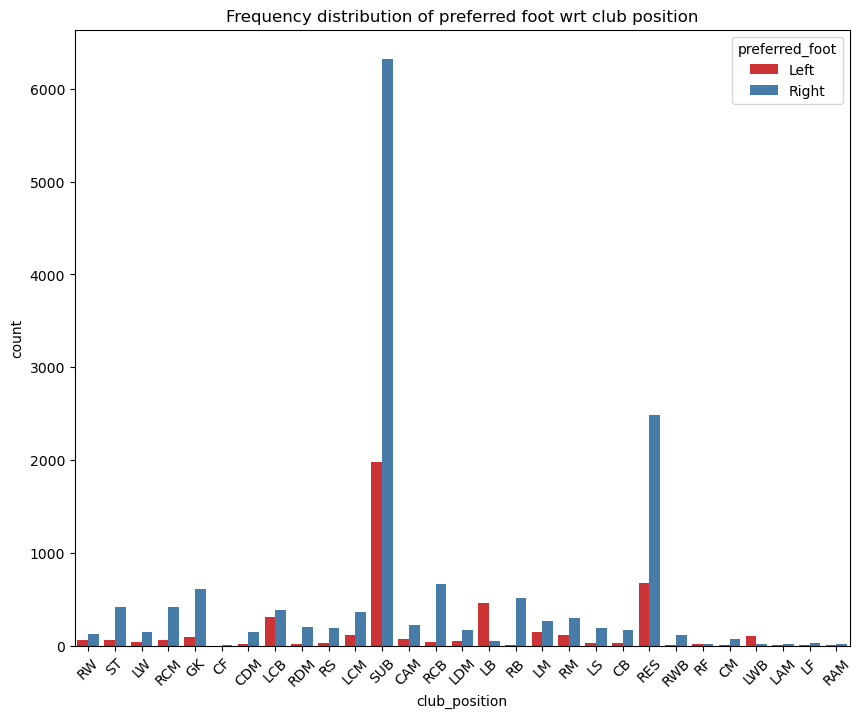

In [47]:
f, ax = plt.subplots(figsize = (10,8))
ax = sns.countplot(x='club_position', hue = 'preferred_foot', data = df, palette = 'Set1')
ax.set_title('Frequency distribution of preferred foot wrt club position')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()


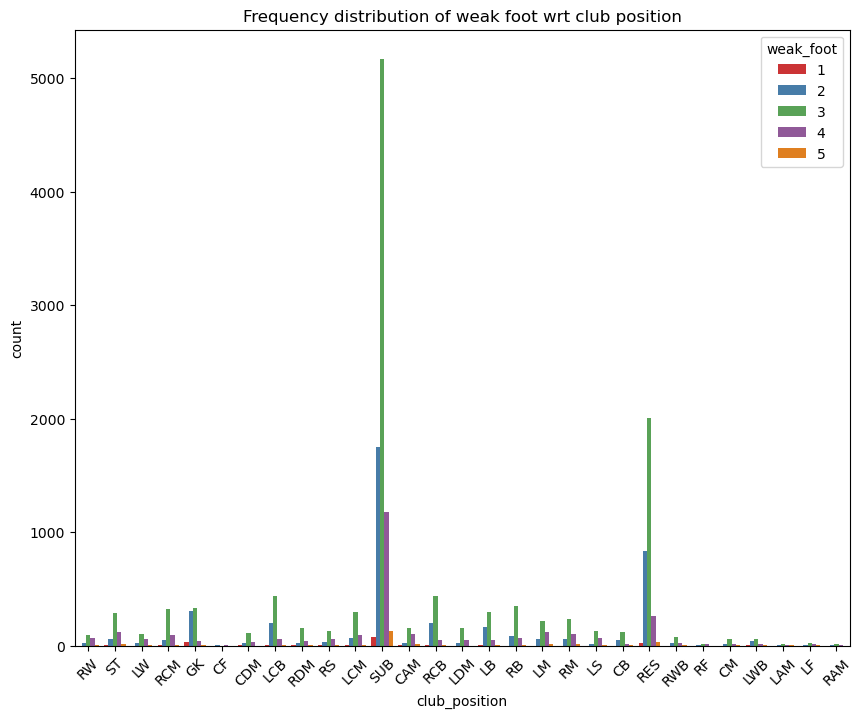

In [48]:
f, ax = plt.subplots(figsize = (10,8))
ax = sns.countplot(x='club_position', hue = 'weak_foot', data = df, palette = 'Set1')
ax.set_title('Frequency distribution of weak foot wrt club position')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()


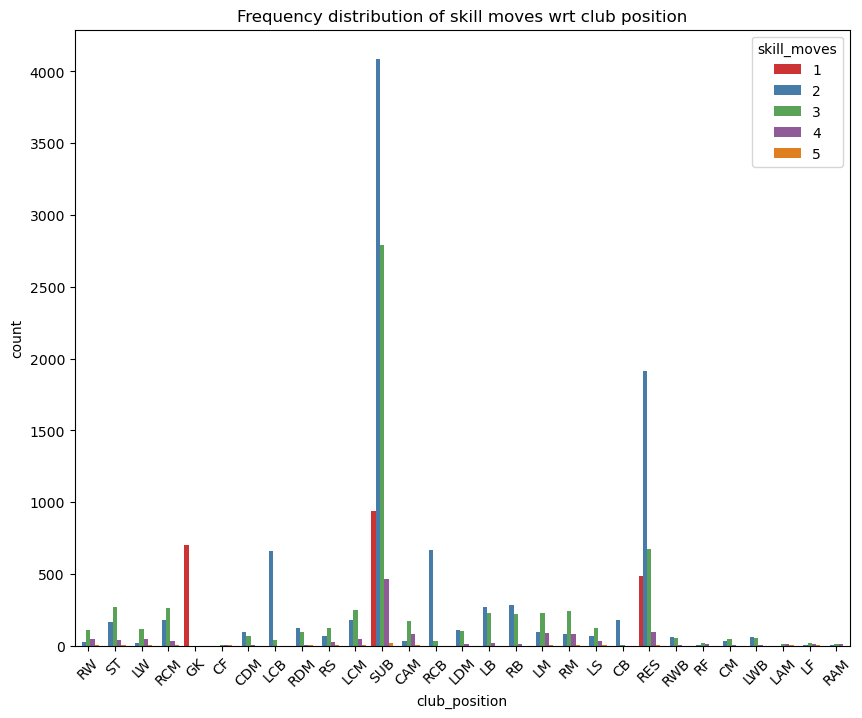

In [49]:
f, ax = plt.subplots(figsize = (10,8))
ax = sns.countplot(x='club_position', hue = 'skill_moves', data = df, palette = 'Set1')
ax.set_title('Frequency distribution of skill moves wrt club position')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

/tmp/ipykernel_81771/4024912077.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,4))


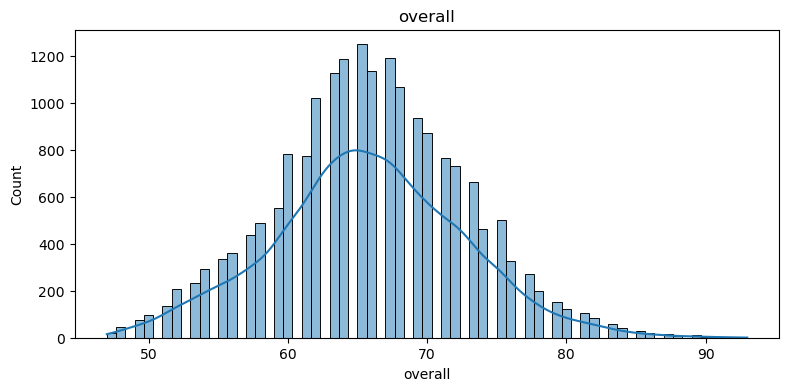

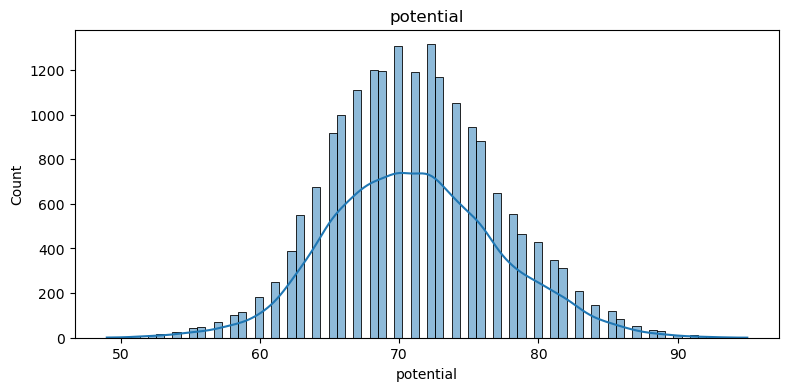

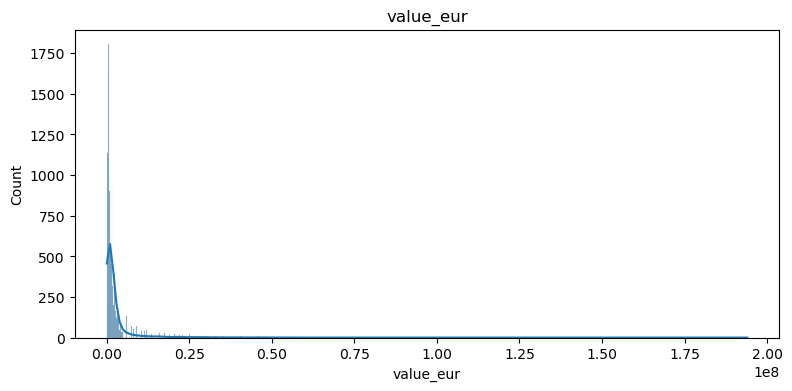

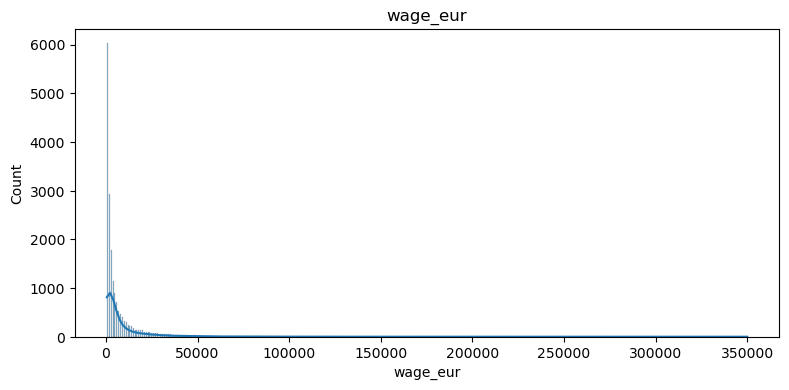

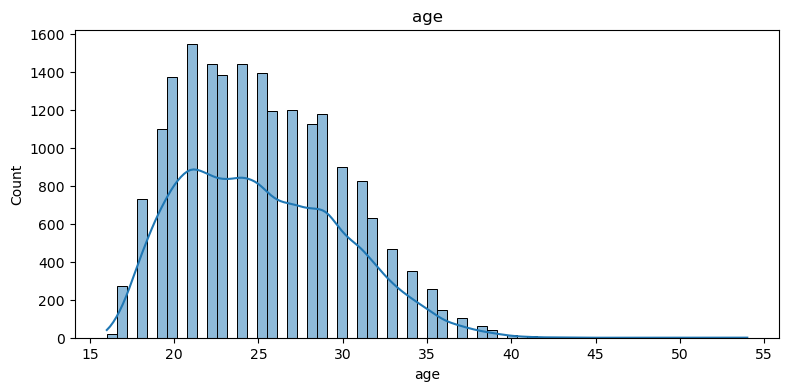

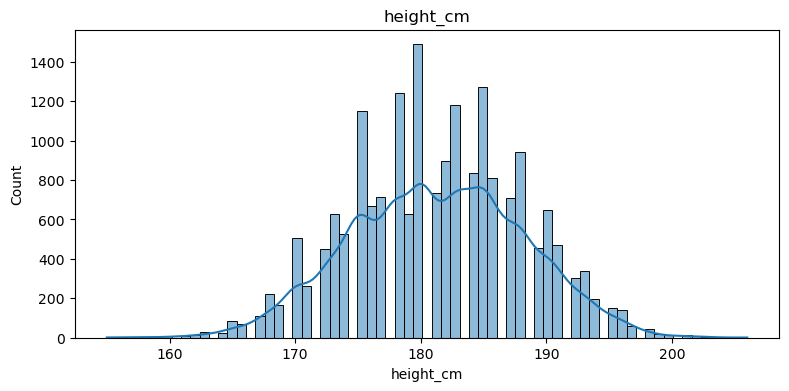

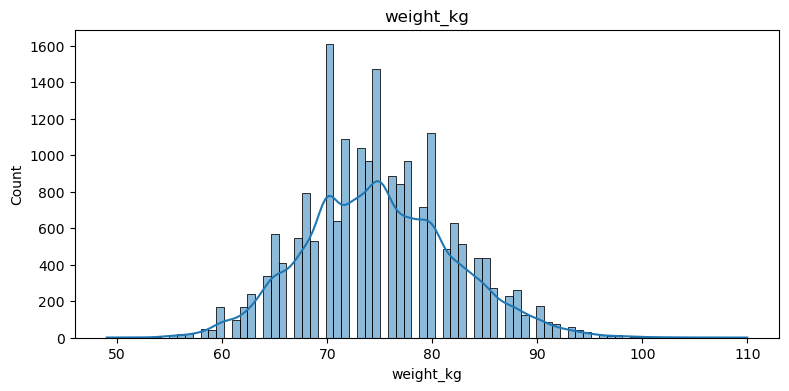

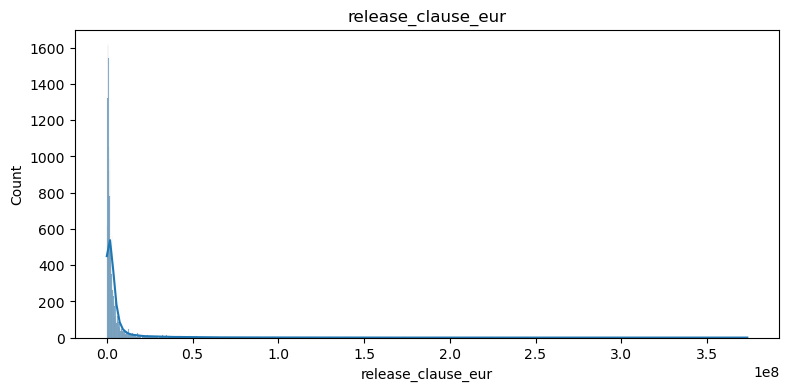

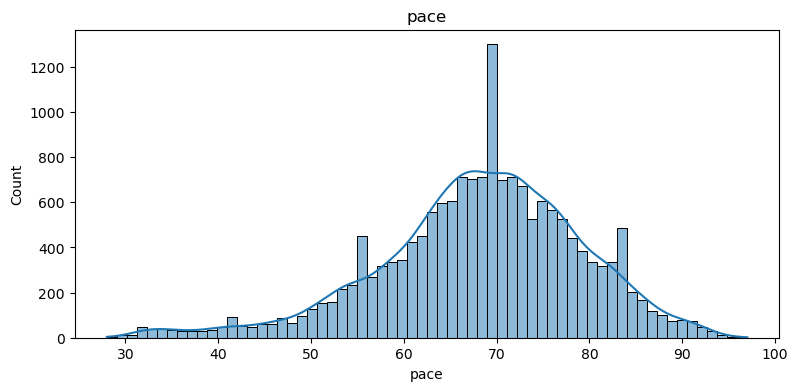

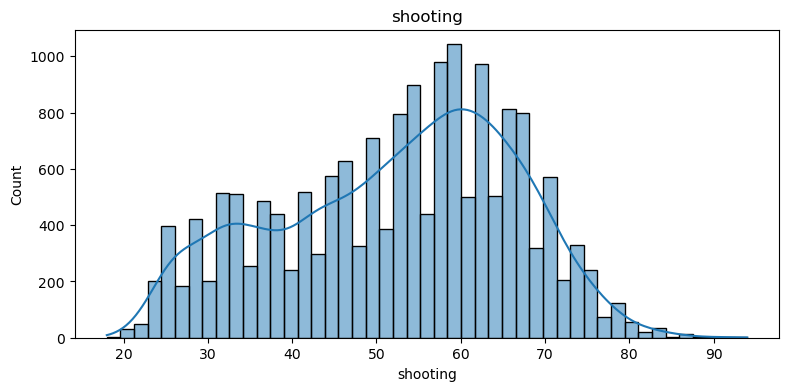

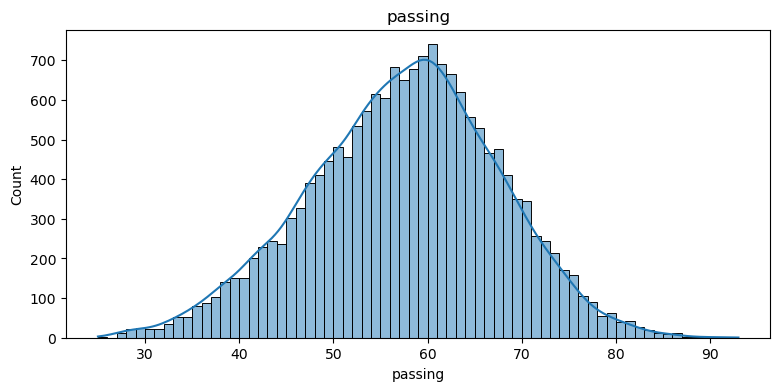

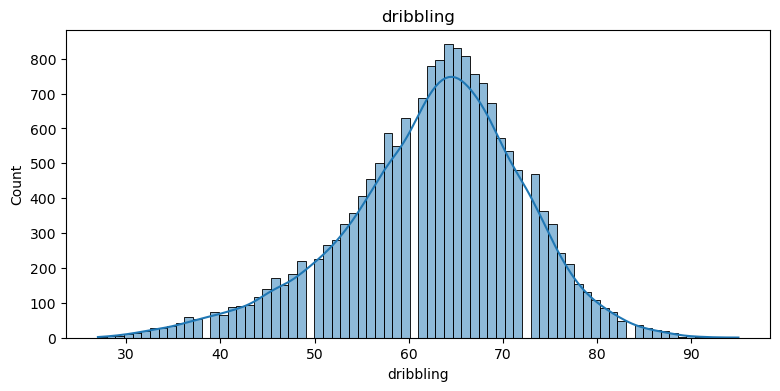

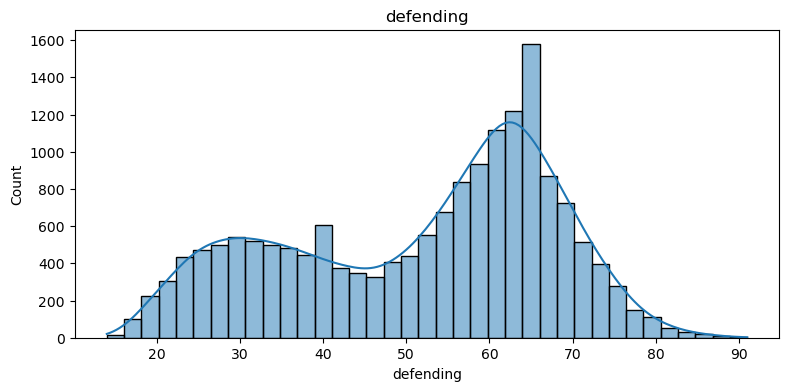

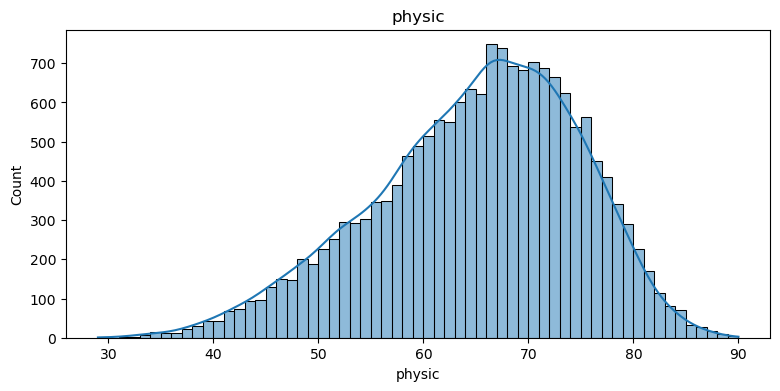

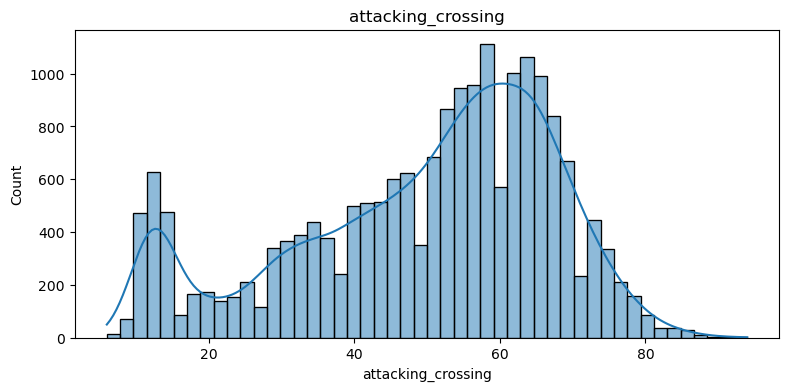

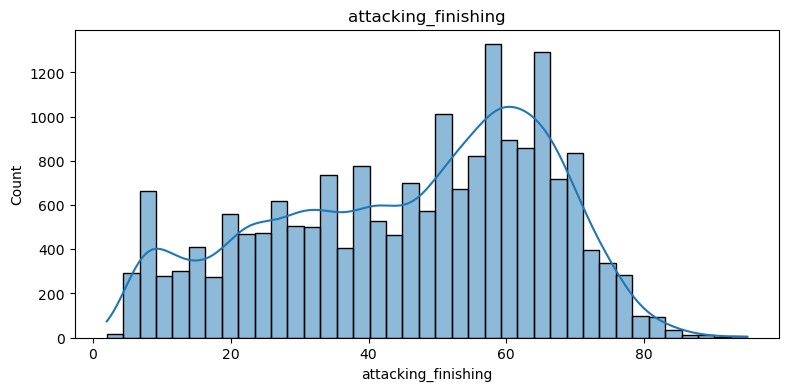

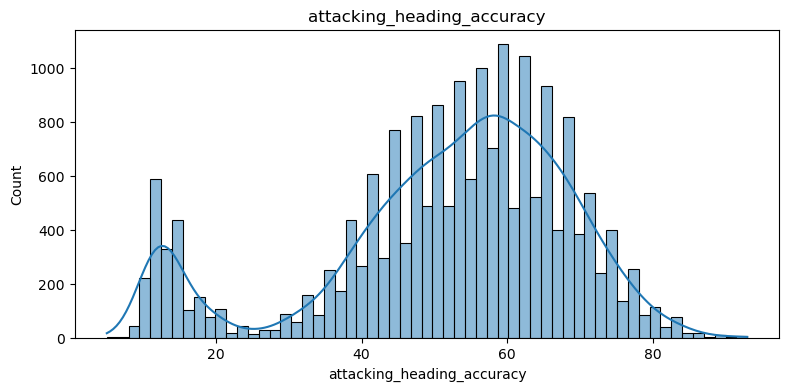

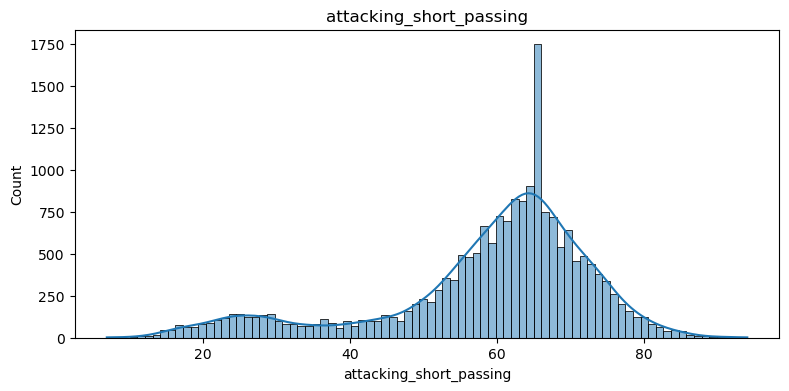

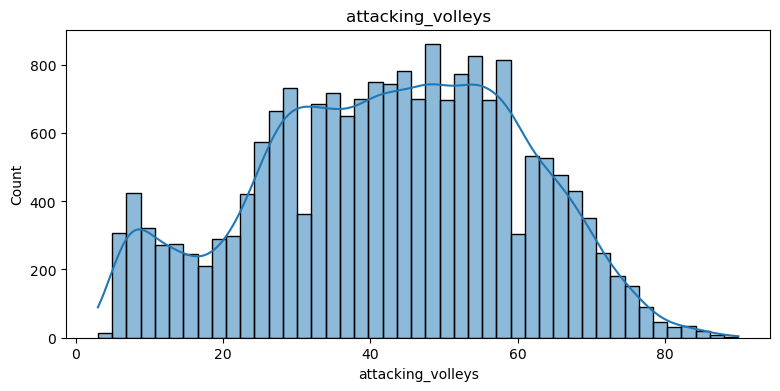

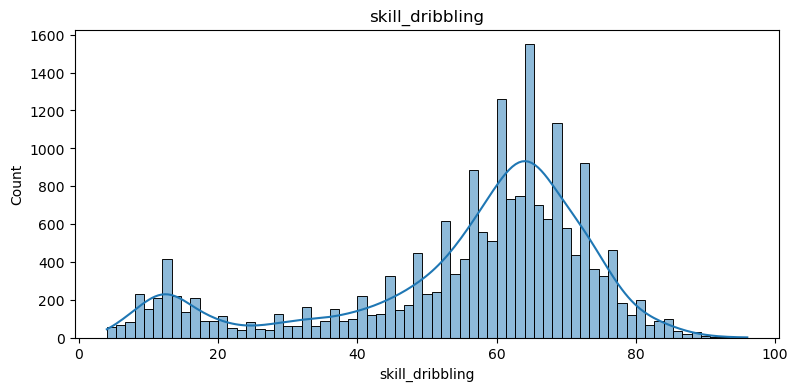

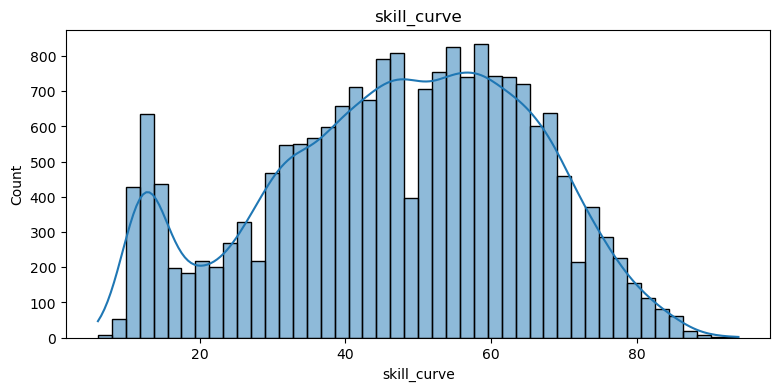

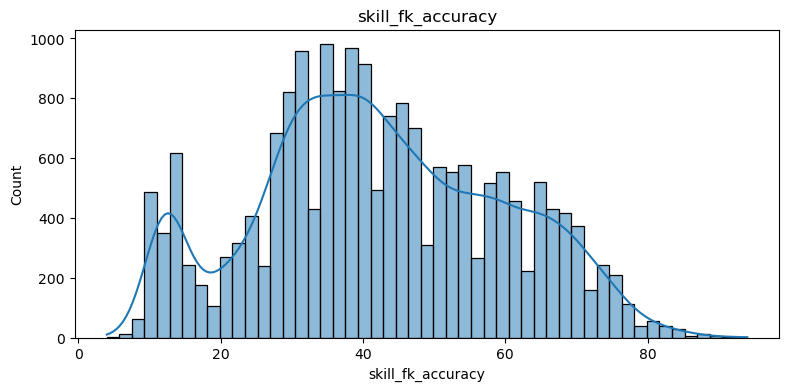

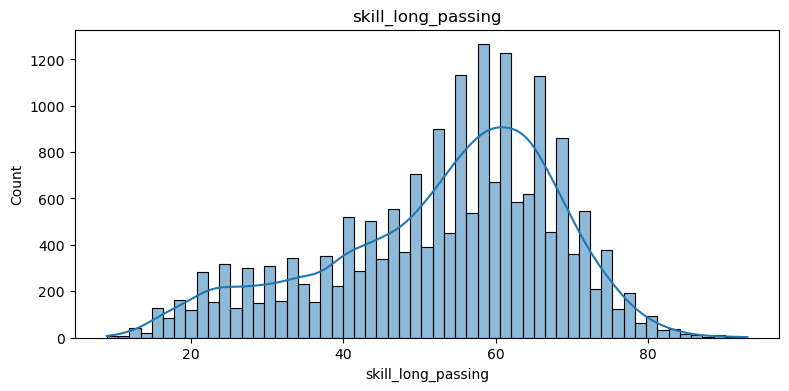

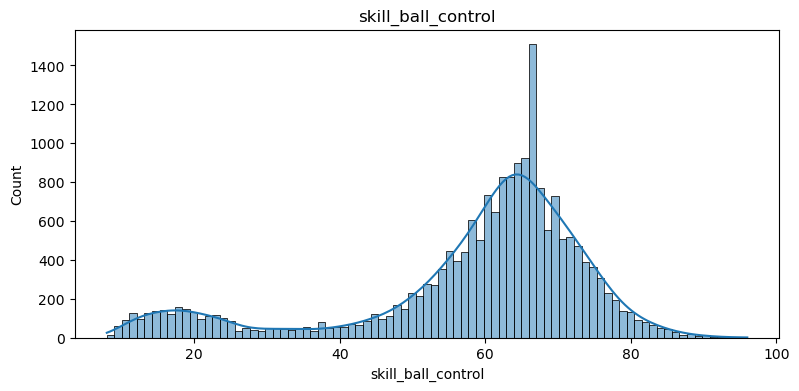

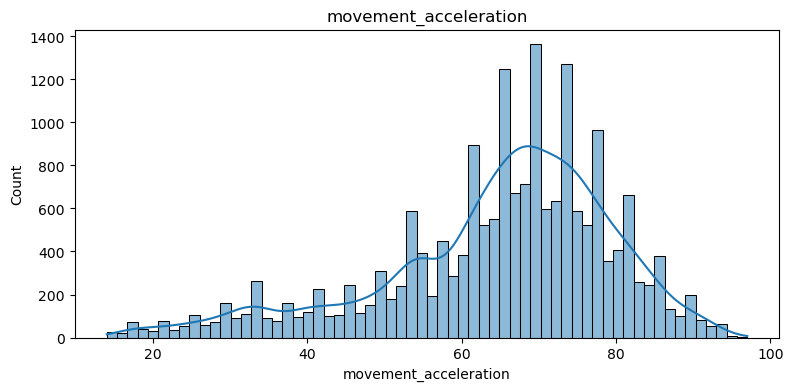

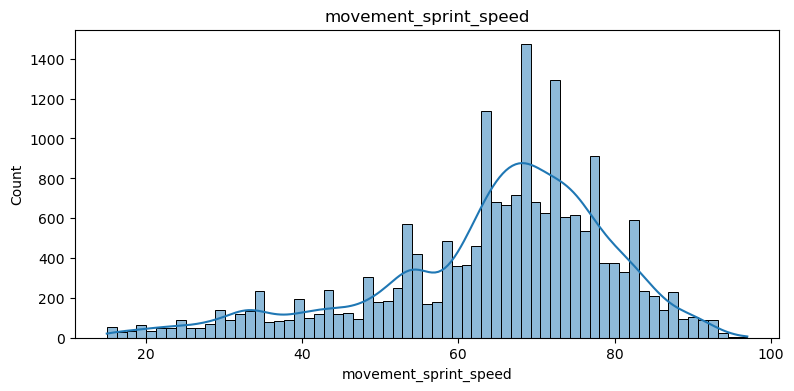

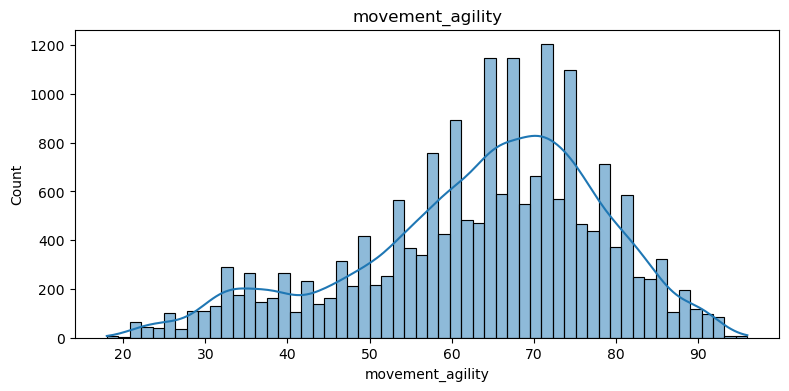

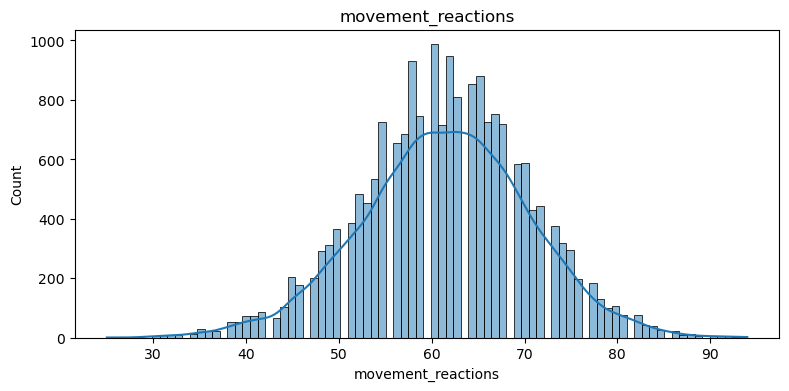

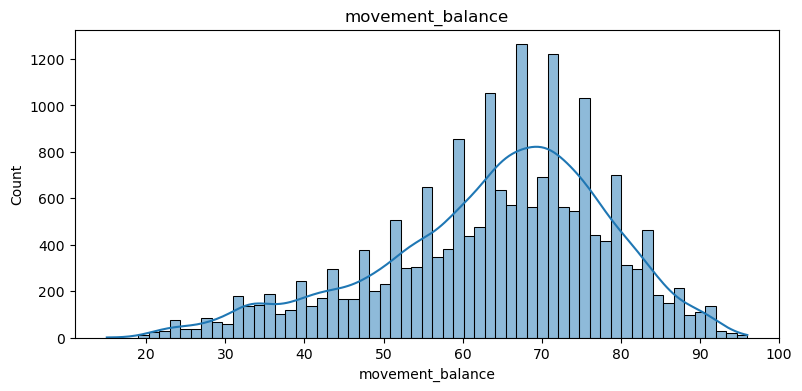

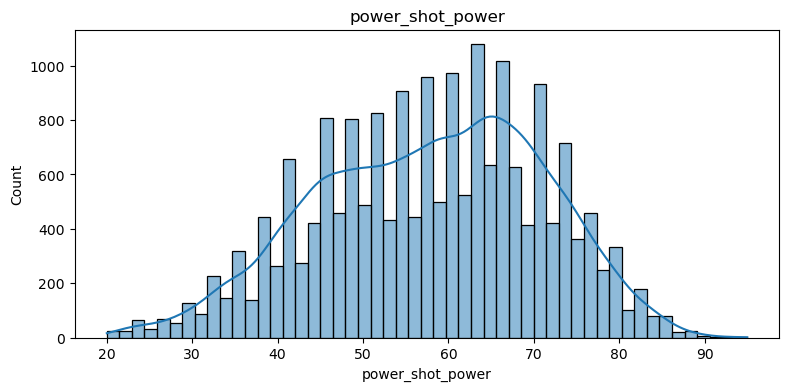

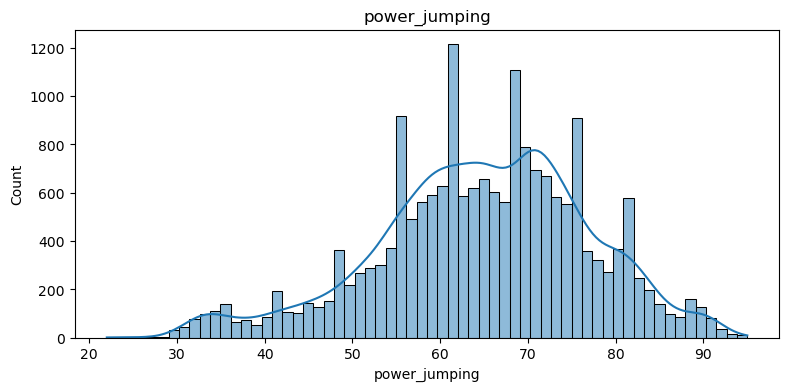

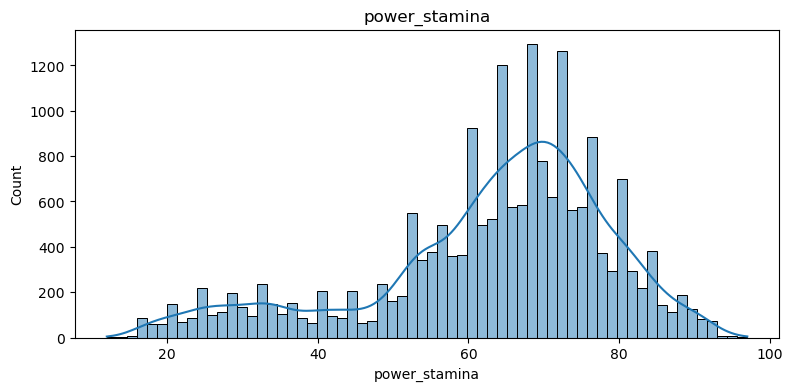

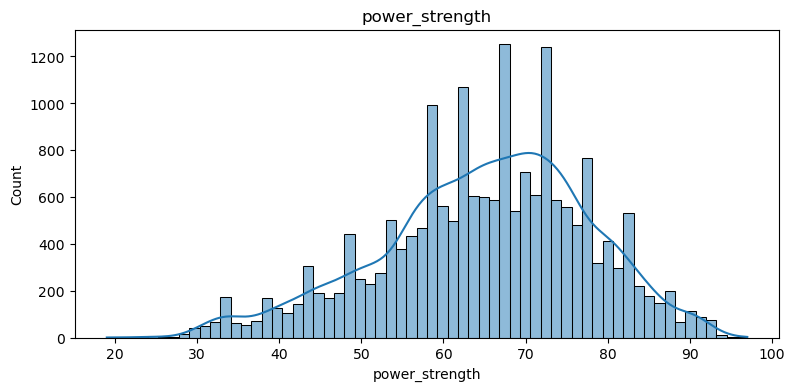

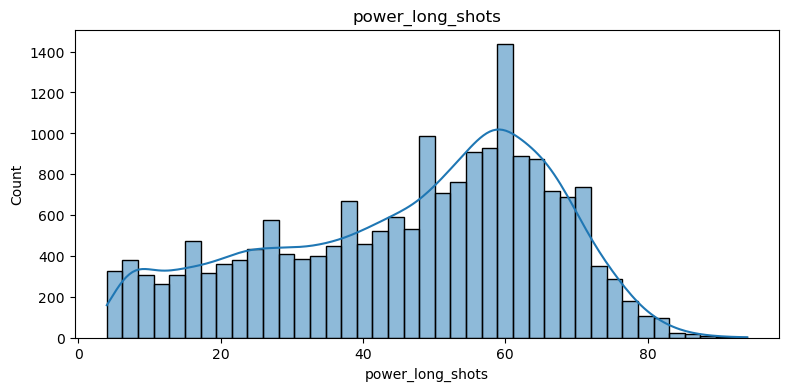

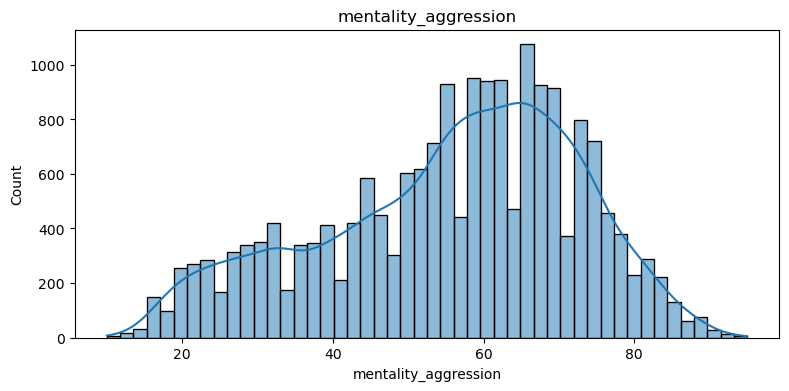

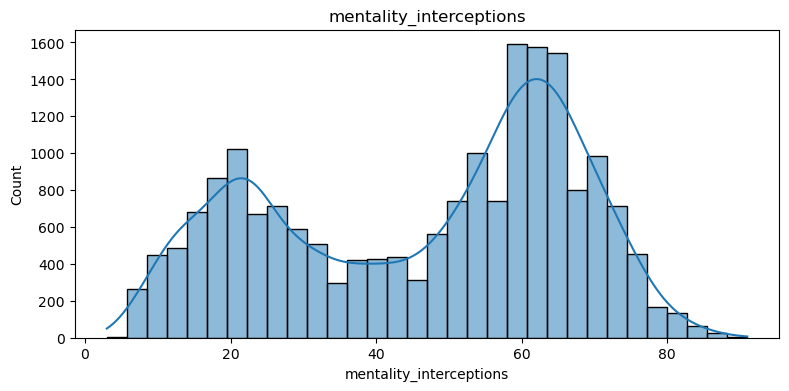

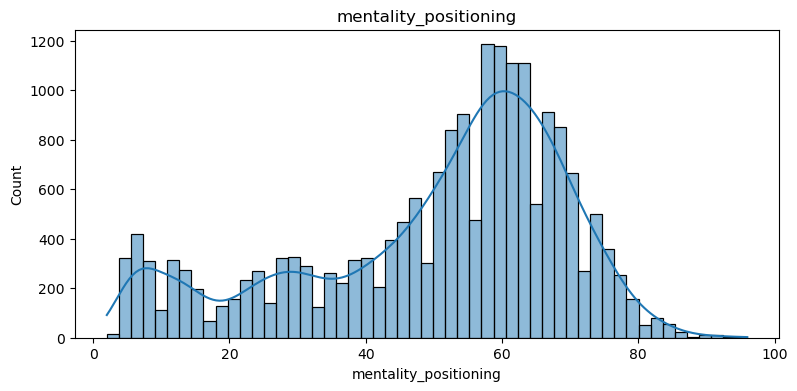

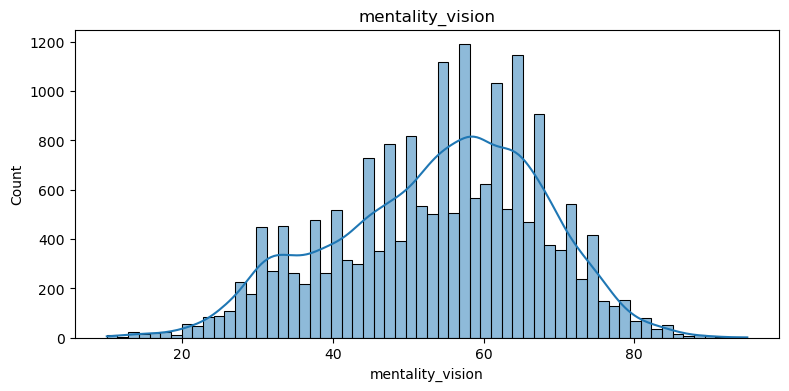

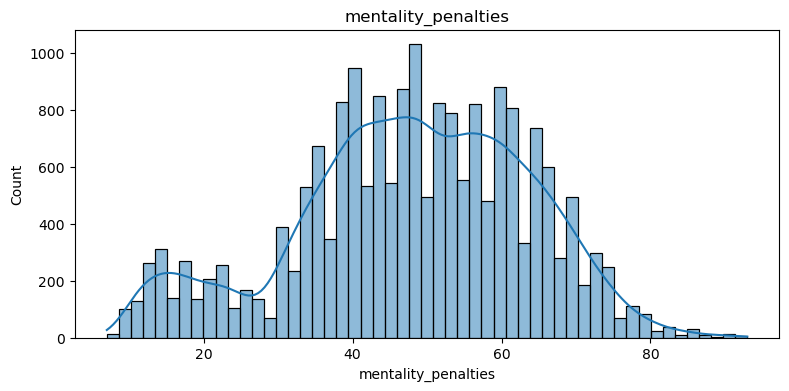

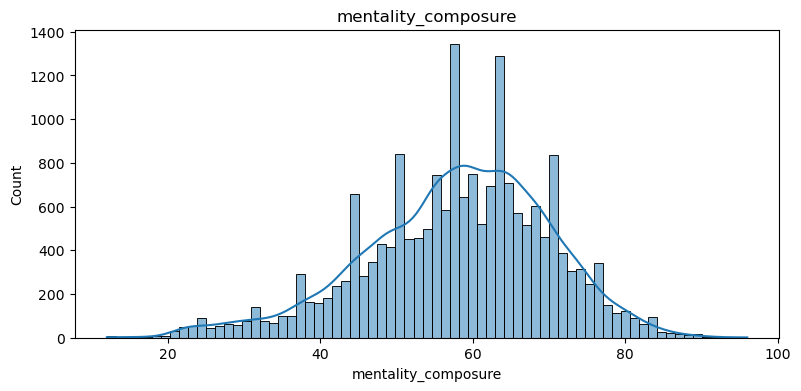

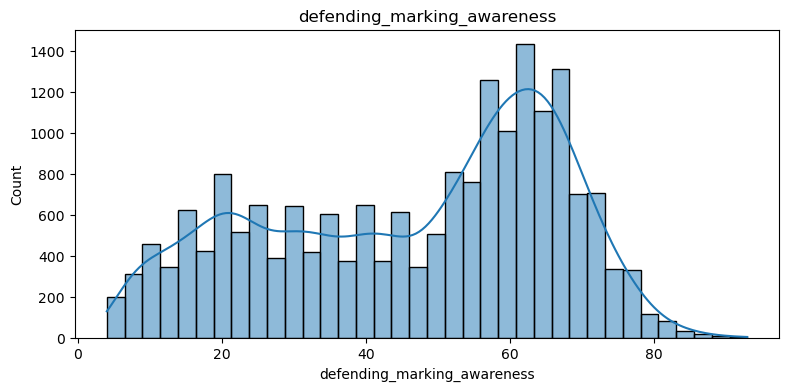

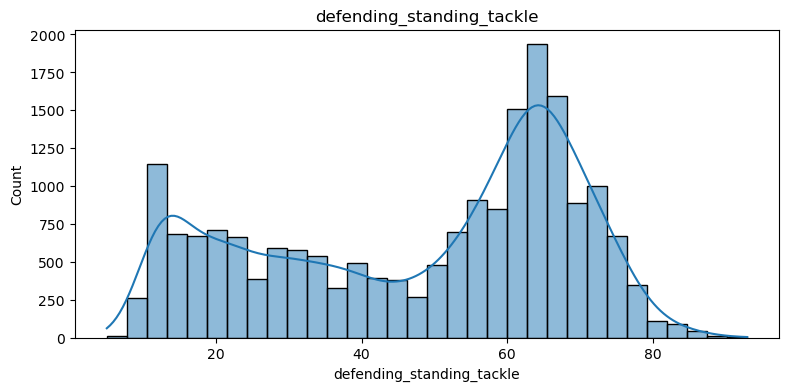

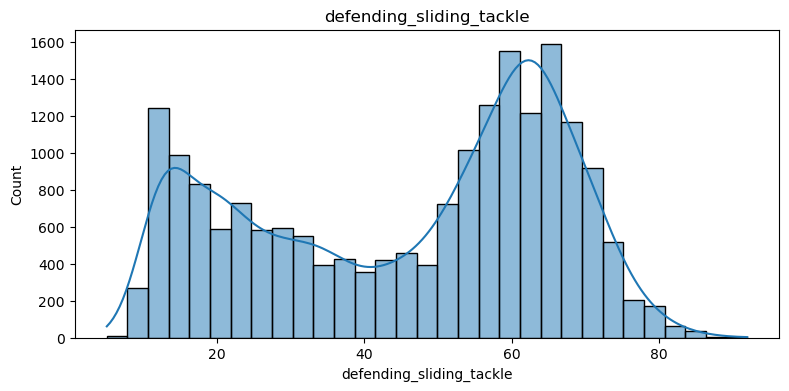

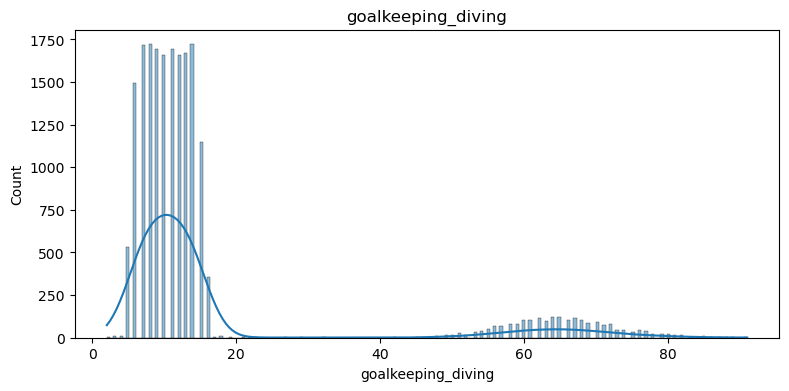

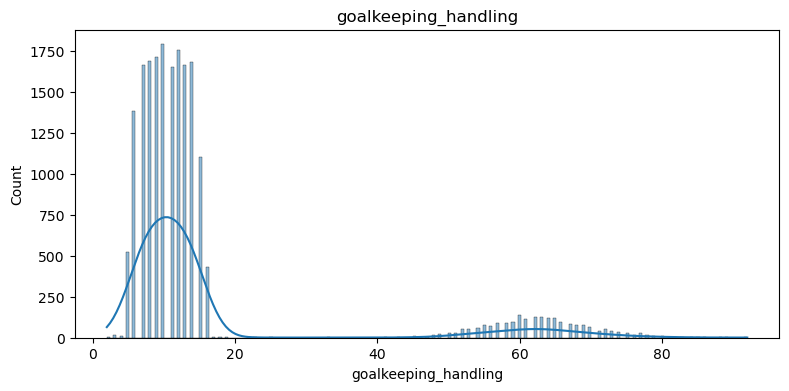

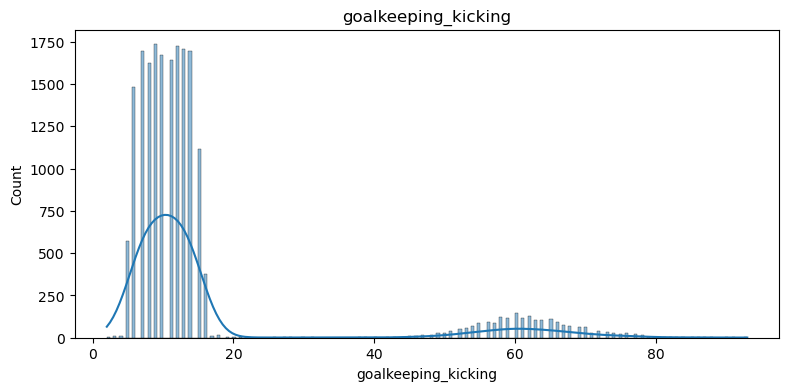

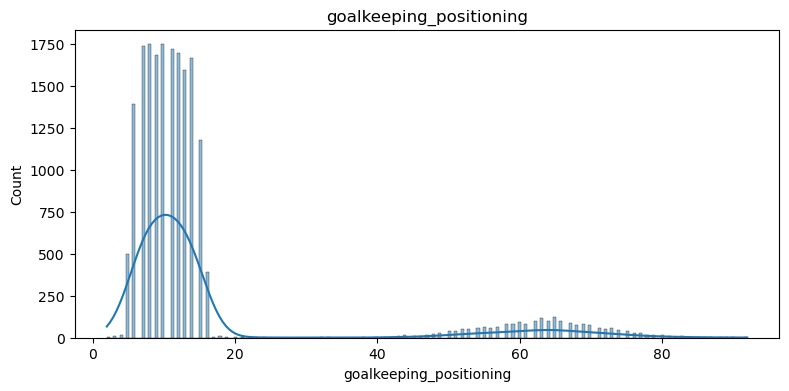

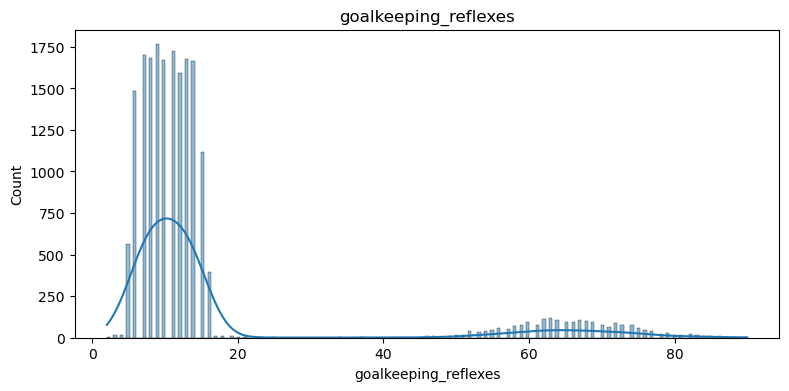

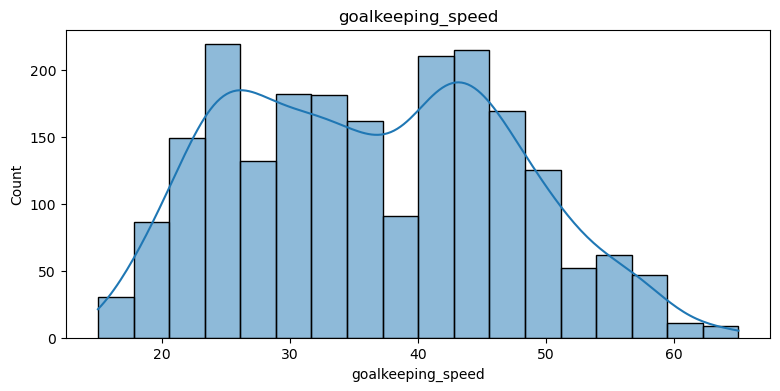

In [50]:
for column in continuous_variables:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.histplot(df[column], kde=True)
    plt.title(column)

In [51]:
df.drop(columns = ['player_url','short_name','long_name','dob','value_eur', 'wage_eur',
         'club_name','league_name','league_level','club_loaned_from','club_joined', 'club_jersey_number', 'club_contract_valid_until', 'nation_team_id',  'nation_jersey_number', 'release_clause_eur', 'player_tags',
         'player_traits','player_face_url', 'club_logo_url','nation_logo_url','nation_flag_url'], axis = 1, inplace = True)

In [52]:
lower_boundries= []
upper_boundries= []
for i in ["age", "height_cm", "weight_kg"]:
    IQR= df[i].quantile(0.75) - df[i].quantile(0.25)
    lower_bound = df[i].quantile(0.25)-(1.5*IQR)
    upper_bound = df[i].quantile(0.75) + (1.5*IQR)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)
    
    
#-----------------------

#wrong values as a result


age : 9.0 , 41.0
height_cm : 161.0 , 201.0
weight_kg : 55.0 , 95.0


In [53]:
import numpy as np

In [54]:
df.loc[(df['height_cm'] >=170) & (df['weight_kg'] <= 55),'height_cm']=np.nan

In [55]:
df.loc[(df['height_cm'] <=190) & (df['weight_kg'] >= 100),'height_cm']=np.nan

In [56]:
df.loc[(df['height_cm'] >=170) & (df['weight_kg'] <= 55),'height_cm']=np.nan

In [57]:
df.loc[(df['height_cm'] <=190) & (df['weight_kg'] >= 100),'height_cm']=np.nan

In [58]:
df = df[df.height_cm.notnull()]
df = df[df.weight_kg.notnull()]

In [59]:
df['player_positions'] = df['player_positions'].str.split(', ')
df = df.explode('player_positions')
df = df.reset_index(drop=True)
print(df)

       sofifa_id player_positions  overall  potential  age  height_cm  \
0         158023               RW       93         93   34      170.0   
1         158023               ST       93         93   34      170.0   
2         158023               CF       93         93   34      170.0   
3         188545               ST       92         92   32      185.0   
4          20801               ST       91         91   36      187.0   
...          ...              ...      ...        ...  ...        ...   
31930     261962              CDM       47         52   22      180.0   
31931     262040               CM       47         59   19      175.0   
31932     262760               CM       47         55   21      178.0   
31933     262820               ST       47         60   19      173.0   
31934     264540              CAM       47         60   19      167.0   

       weight_kg club_position  club_team_id     nationality_name  ...  \
0             72            RW          73.0     

In [60]:
df.loc[(df['player_positions']=='GK') & pd.notnull(df['attacking_crossing']),'attacking_crossing']=np.nan
df.loc[(df['player_positions']=='GK') & pd.notnull(df['attacking_heading_accuracy']),'attacking_heading_accuracy']=np.nan
df.loc[(df['player_positions']=='GK') & pd.notnull(df['attacking_finishing']),'attacking_finishing']=np.nan
df.loc[(df['player_positions']=='GK') & pd.notnull(df['attacking_short_passing']),'attacking_short_passing']=np.nan
df.loc[(df['player_positions']=='GK') & pd.notnull(df['attacking_volleys']),'attacking_volleys']=np.nan
df.loc[(df['player_positions']=='GK') & pd.notnull(df['defending_marking_awareness']),'defending_marking_awareness']=np.nan
df.loc[(df['player_positions']=='GK') & pd.notnull(df['defending_standing_tackle']),'defending_standing_tackle']=np.nan
df.loc[(df['player_positions']=='GK') & pd.notnull(df['defending_sliding_tackle']),'defending_sliding_tackle']=np.nan

In [61]:
df.loc[(df['player_positions']!='GK') & pd.notnull(df['goalkeeping_diving']),'goalkeeping_diving']=np.nan
df.loc[(df['player_positions']!='GK') & pd.notnull(df['goalkeeping_handling']),'goalkeeping_handling']=np.nan
df.loc[(df['player_positions']!='GK') & pd.notnull(df['goalkeeping_kicking']),'goalkeeping_kicking']=np.nan
df.loc[(df['player_positions']!='GK') & pd.notnull(df['goalkeeping_positioning']),'goalkeeping_positioning']=np.nan
df.loc[(df['player_positions']!='GK') & pd.notnull(df['goalkeeping_reflexes']),'goalkeeping_reflexes']=np.nan
df.loc[(df['player_positions']!='GK') & pd.notnull(df['goalkeeping_speed']),'goalkeeping_speed']=np.nan


In [62]:
df.drop(columns = ['sofifa_id', 'club_team_id'], axis = 1, inplace = True)

In [63]:
for i in df:
    print(i, ":", df[i].unique())

player_positions : ['RW' 'ST' 'CF' 'LW' 'CAM' 'CM' 'GK' 'CDM' 'LM' 'CB' 'RB' 'RM' 'LB' 'RWB'
 'LWB']
overall : [93 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70
 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47]
potential : [93 92 91 95 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71
 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49]
age : [34 32 36 29 30 28 22 35 27 33 26 31 20 24 21 25 23 39 38 37 18 43 19 40
 41 17 16 42 54]
height_cm : [170. 185. 187. 175. 181. 188. 182. 193. 168. 199. 183. 177. 191. 196.
 184. 179. 194. 173. 172. 180. 195. 165. 189. 178. 174. 197. 163. 167.
 190. 176. 186. 169. 192. 171. 166. 201. 198. 158. 200. 161. 162. 164.
 160. 202. 156. 159. 203. 206. 155.]
weight_kg : [ 72  81  83  68  70  87  73  93  85  89  96  78  84  92  69  71  86  75
  91  90  82  76  94  80  66  60  64  74  59  67  77  79  95  61  88 100
  65  99  63  62  97  98  58  55  57 101  56 102 103 104  54  53 107 105
  5

In [64]:
categorical = ['player_positions', 'club_position', 'nationality_name', 'nation_position', 'work_rate', 'body_type','preferred_foot']

In [65]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

for feature in categorical:
    df[feature]= le.fit_transform(df[feature])

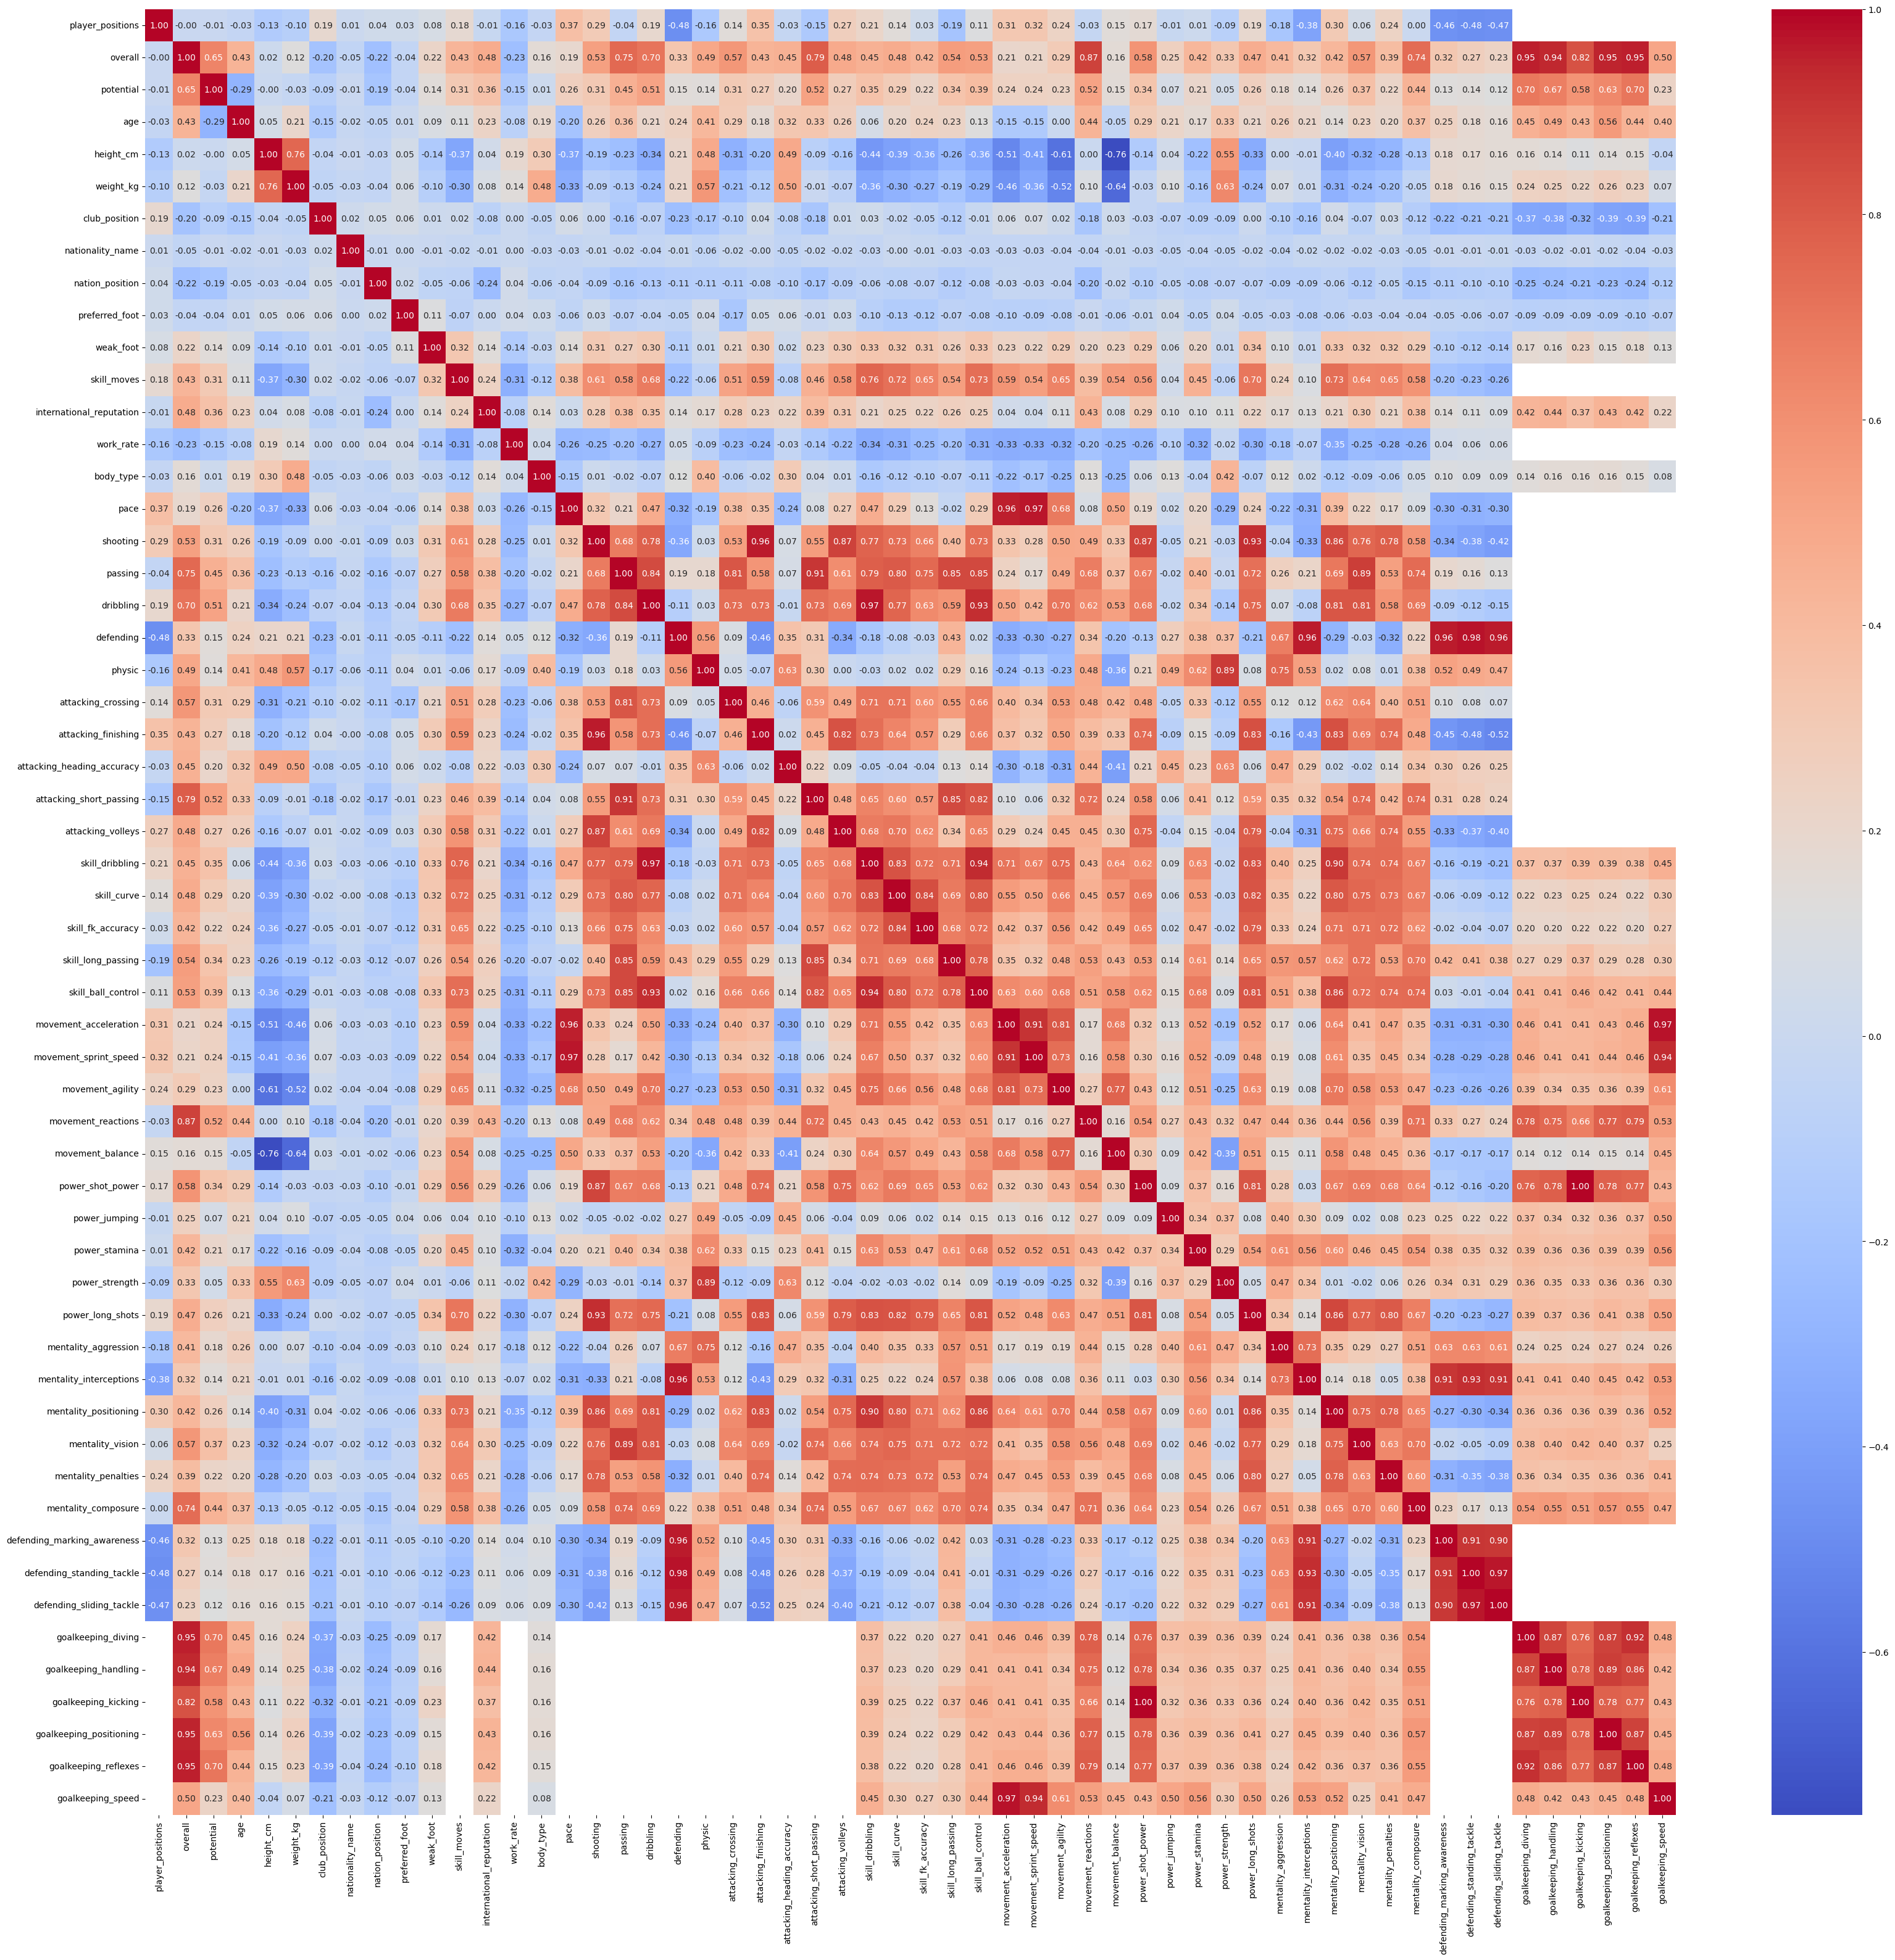

In [66]:
correlation_matrix = df.corr()
plt.figure(figsize=(40, 38))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm', fmt=".2f")
plt.show()

In [67]:
#remove: 
#overall - as it's a summary of all other parameters
#movement_sprint_speed - correlation with movement_acceleration and goalkeeping_speed
#attacking_finishing + power_long_shots - correlation with shooting
#attacking_short_passing + mentality_vision - correlation with passing
#dribbling + skill_dribbling - correlation with skill_ball_control
#mentality_interceptions + defending_marking_awareness + defending_standing_tackle + defending_sliding_tackle - correlation with defending
#power_strenght - correlation with physic
#power_shot_power - correlation with goalkeeping_kicking
#mentality_positioning - correlation with skill_dribbling
#goalkeeping_diving - correlation with goalkeeping_reflexes
#goalkeeping_handling - correlation with goalkeeping_positioning
#movement_acceleration - correlation with goalkeeping_speed




In [68]:
df.drop(columns = ['overall', 'movement_acceleration', 'movement_sprint_speed', 'attacking_finishing','power_long_shots','attacking_short_passing','mentality_vision','dribbling','mentality_interceptions',
                  'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
                  'power_strength','power_shot_power','mentality_positioning','goalkeeping_diving','goalkeeping_handling', 'skill_dribbling'], axis = 1, inplace = True)

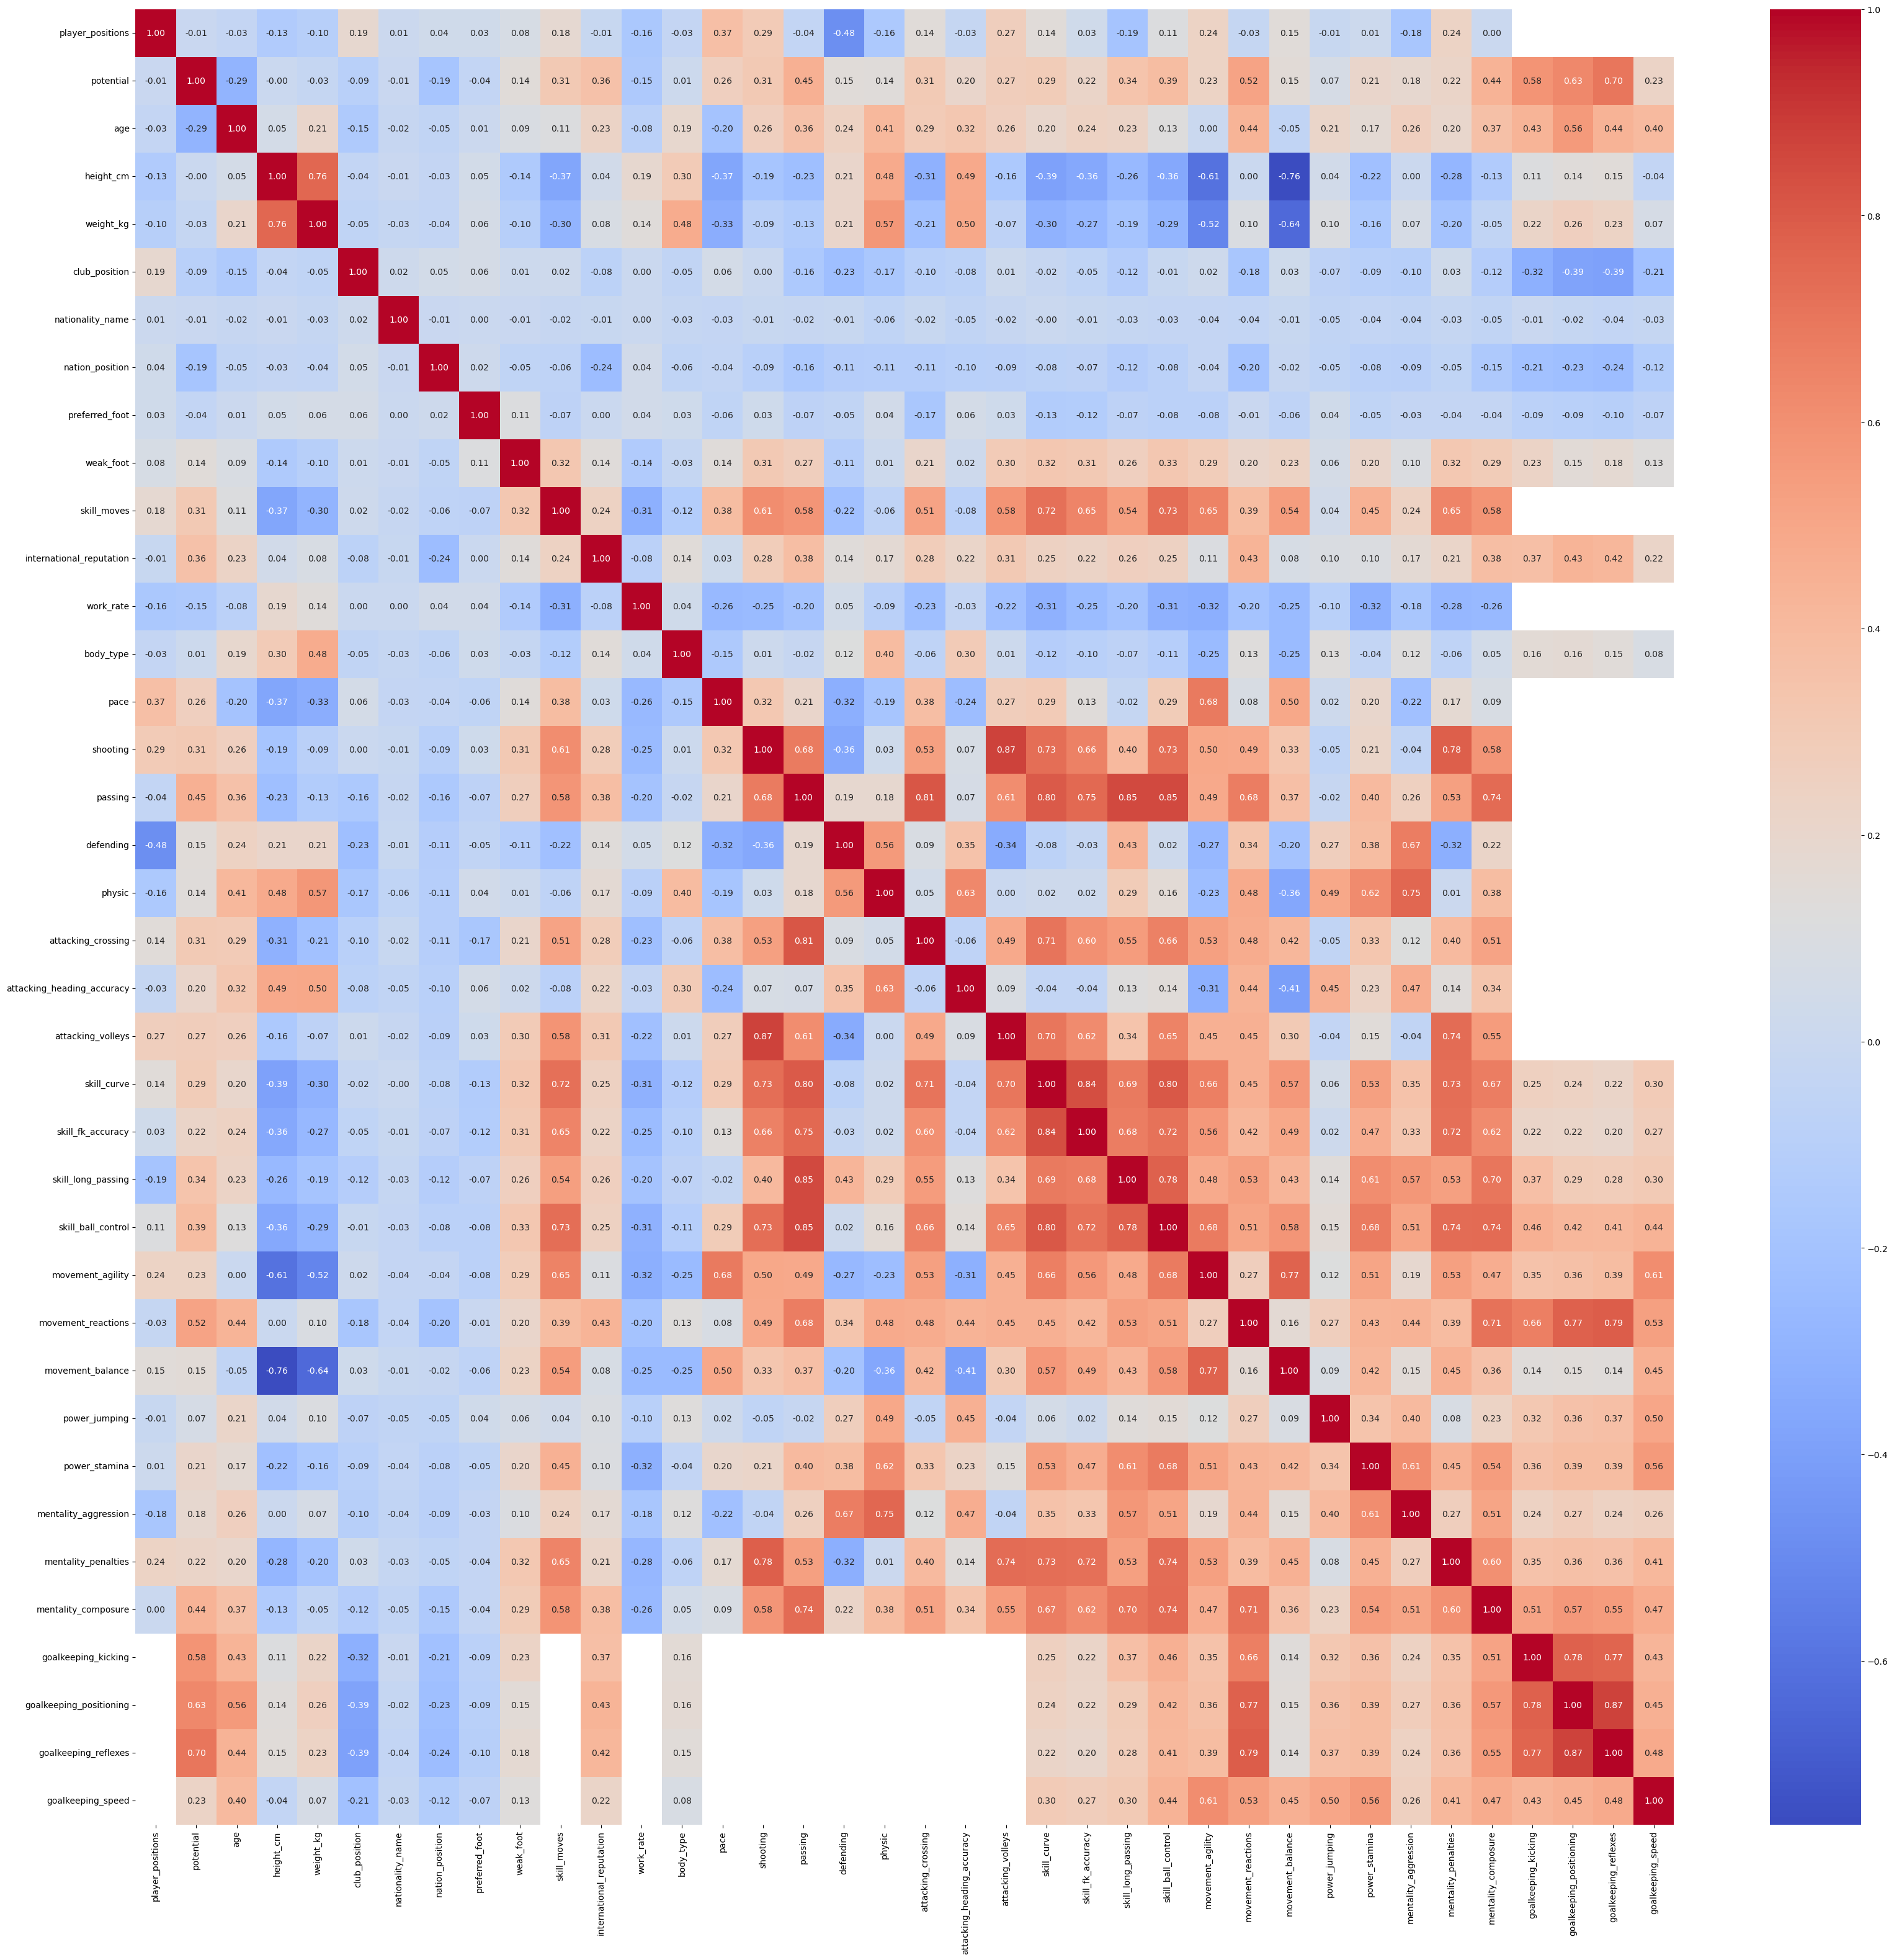

In [69]:
correlation_matrix = df.corr()
plt.figure(figsize=(40, 38))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm', fmt=".2f")
plt.show()

In [70]:
df.drop(columns = ['attacking_volleys', 'passing', 'skill_curve', 'goalkeeping_positioning'], axis = 1, inplace = True)

In [71]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

newdf = df.copy()
y = df['player_positions']
columns_to_drop = ['player_positions', 'club_position', 'nation_position']
x1 = df.drop(columns=columns_to_drop)



In [72]:
X1_train, X1_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

#replace NaN and split to test and train
imputer = SimpleImputer(strategy='constant', fill_value=-1)
X1_train_imputed = imputer.fit_transform(X1_train)
X1_test_imputed = imputer.transform(X1_test)

model = RandomForestClassifier()
model.fit(X1_train_imputed, y_train)

accuracy = model.score(X1_test_imputed, y_test)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.2985752309378425


In [73]:
columns_to_drop2 = ['player_positions']

In [74]:
x2 = df.drop(columns=columns_to_drop2)

In [75]:
X2_train, X2_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)

#replace NaN and split to test and train
imputer = SimpleImputer(strategy='constant', fill_value=-1)
X2_train_imputed = imputer.fit_transform(X2_train)
X2_test_imputed = imputer.transform(X2_test)

model = RandomForestClassifier()
model.fit(X2_train_imputed, y_train)

accuracy = model.score(X2_test_imputed, y_test)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.29841866290903396


In [76]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [77]:
import xgboost as xgb

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
dtrain = xgb.DMatrix(x1, label=y)

In [80]:
params = {
    'objective': 'multi:softmax', 
    'num_class': len(pd.unique(y)),
    'max_depth': 3,
    'learning_rate': 0.1,
    'eval_metric': 'mlogloss' 
}

In [81]:
dtrain = xgb.DMatrix(X1_train, label=y_train)
dtest = xgb.DMatrix(X1_test, label=y_test)

In [82]:
num_rounds = 100 
model = xgb.train(params, dtrain, num_rounds)

y_pred = model.predict(dtest)
y_pred_classes = y_pred.astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy}')

Accuracy: 0.4977297635822765


In [83]:
dtrain = xgb.DMatrix(x2, label=y)

In [84]:
dtrain = xgb.DMatrix(X2_train, label=y_train)
dtest = xgb.DMatrix(X2_test, label=y_test)

In [85]:
params = {
    'objective': 'multi:softmax', 
    'num_class': len(pd.unique(y)),
    'max_depth': 3,
    'learning_rate': 0.1,
    'eval_metric': 'mlogloss' 
}

In [86]:
num_rounds = 100 
model = xgb.train(params, dtrain, num_rounds)

y_pred = model.predict(dtest)
y_pred_classes = y_pred.astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5050884609362768


In [87]:
pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/40/c6/2e91eefb757822e70d351e02cc38d07c137212ae7c41ac12746415b4860a/scikit_learn-1.3.2-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached scikit_learn-1.3.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-macosx_12_0_arm64.whl (9.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


In [88]:
pip uninstall imblearn --yes

Note: you may need to restart the kernel to use updated packages.


In [89]:
conda install -c conda-forge imbalanced-learn

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
- DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
\ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-arm64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/osx-arm64/current_repodata.json HTTP/1.1" 304 0
| DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.2
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages upda

In [90]:
pip install scikit-learn==1.2.2

  Using cached scikit_learn-1.2.2-cp311-cp311-macosx_12_0_arm64.whl (8.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
Note: you may need to restart the kernel to use updated packages.


In [91]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [94]:
oversampler = SMOTE(sampling_strategy='minority')

X1_train_resampled, y_train_resampled = oversampler.fit_resample(X1_train_imputed, y_train)

model = RandomForestClassifier()
model.fit(X1_train_resampled, y_train_resampled)

y_pred = model.predict(X1_test_imputed)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.2968529826209488


In [95]:
oversampler = SMOTE(sampling_strategy='minority')

X2_train_resampled, y_train_resampled = oversampler.fit_resample(X2_train_imputed, y_train)

model = RandomForestClassifier()
model.fit(X2_train_resampled, y_train_resampled)

y_pred = model.predict(X2_test_imputed)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.2995146391106936


In [96]:
oversampler = RandomOverSampler(sampling_strategy='minority')
X1_train_resampled, y_train_resampled = oversampler.fit_resample(X1_train, y_train)

dtrain = xgb.DMatrix(X1_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X1_test, label=y_test)

In [97]:
params = {
    'objective': 'multi:softmax', 
    'num_class': len(pd.unique(y)),
    'max_depth': 3,
    'learning_rate': 0.1,
    'eval_metric': 'mlogloss' 
}

In [98]:
num_rounds = 100 
model = xgb.train(params, dtrain, num_rounds)

y_pred = model.predict(dtest)
y_pred_classes = y_pred.astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy}')

Accuracy: 0.4739314232033819


In [102]:
oversampler = RandomOverSampler(sampling_strategy='minority')
X2_train_resampled, y_train_resampled = oversampler.fit_resample(X2_train, y_train)

dtrain = xgb.DMatrix(X2_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X2_test, label=y_test)

In [103]:
params = {
    'objective': 'multi:softmax', 
    'num_class': len(pd.unique(y)),
    'max_depth': 3,
    'learning_rate': 0.1,
    'eval_metric': 'mlogloss' 
}

In [104]:
num_rounds = 100 
model = xgb.train(params, dtrain, num_rounds)

y_pred = model.predict(dtest)
y_pred_classes = y_pred.astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy}')

Accuracy: 0.4831689369030844


In [105]:
from sklearn.preprocessing import MinMaxScaler

In [113]:
scaler = MinMaxScaler()

In [114]:
X1_train_scaled = scaler.fit_transform(X1_train_imputed)

In [115]:
X1_test_scaled = scaler.transform(X1_test_imputed)

In [117]:
model = RandomForestClassifier()
model.fit(X1_train_scaled, y_train)

y_pred = model.predict(X1_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.2976358227649914


In [118]:
X2_train_scaled = scaler.fit_transform(X2_train_imputed)
X2_test_scaled = scaler.transform(X2_test_imputed)
model = RandomForestClassifier()
model.fit(X2_train_scaled, y_train)

y_pred = model.predict(X2_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.30264599968686395


In [122]:
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [123]:
dtrain = xgb.DMatrix(X1_train_scaled, label=y_train)
dtest = xgb.DMatrix(X1_test_scaled, label=y_test)

In [124]:
params = {
    'objective': 'multi:softmax', 
    'num_class': len(pd.unique(y)),
    'max_depth': 3,
    'learning_rate': 0.1,
    'eval_metric': 'mlogloss' 
}

In [125]:
num_rounds = 100 
model = xgb.train(params, dtrain, num_rounds)

y_pred = model.predict(dtest)
y_pred_classes = y_pred.astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy}')

Accuracy: 0.4977297635822765


In [126]:
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [127]:
dtrain = xgb.DMatrix(X2_train_scaled, label=y_train)
dtest = xgb.DMatrix(X2_test_scaled, label=y_test)

In [128]:
params = {
    'objective': 'multi:softmax', 
    'num_class': len(pd.unique(y)),
    'max_depth': 3,
    'learning_rate': 0.1,
    'eval_metric': 'mlogloss' 
}

In [129]:
num_rounds = 100 
model = xgb.train(params, dtrain, num_rounds)

y_pred = model.predict(dtest)
y_pred_classes = y_pred.astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5050884609362768


In [135]:
from sklearn.linear_model import LogisticRegression

In [160]:
model = LogisticRegression(solver='liblinear', max_iter=500)

In [161]:
X1_train_scaled = scaler.fit_transform(X1_train_imputed)
X1_test_scaled = scaler.transform(X1_test_imputed)

In [162]:
model.fit(X1_train_scaled, y_train)

y_pred = model.predict(X1_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5121340222326601


In [163]:
X2_train_scaled = scaler.fit_transform(X2_train_imputed)
X2_test_scaled = scaler.transform(X2_test_imputed)

In [164]:
model.fit(X2_train_scaled, y_train)

y_pred = model.predict(X2_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5130734304055112
